**Here we are processing the braken output what we got from the shotgun metagenomics, so that it can be used to train the models.**

OTU --> Operational Taxonomic Units

First we will upload the file from drive (combined_otu_data.tsv)
then we will import the the necessary libraries

In [ ]:
import pandas as pd
# This line imports the pandas library and assigns it the alias pd.
# Pandas is crucial for working with structured data, like the data in our .tsv file.
# In this notebook, we use pandas to load your data, manipulate columns, and merge dataframes."""

import numpy as np
# This line imports the NumPy library and assigns it the alias np.
# NumPy is fundamental for numerical operations in Python.
# It provides support for large, multi-dimensional arrays and matrices,and mathematical functions to operate on these arrays."""

Now we will strore the tsv file in a variable called out_df and view it

In [ ]:
out_df= pd.read_csv("/content/drive/MyDrive/combined_otu_data.tsv",sep="\t")
# we have kept the braken output file in drive, and copied its path by mounting the drive
# sep="\t" specifies that the file is delimited by tabs (\t) instead of commas, which is common for TSV files.
out_df
# To view what stored in this dataframe.

,name,taxonomy_id,taxonomy_lvl,SRR32732804.bracken.out_num,SRR32732804.bracken.out_frac,SRR32732805.bracken.out_num,SRR32732805.bracken.out_frac,SRR32732806.bracken.out_num,SRR32732806.bracken.out_frac,SRR32732807.bracken.out_num,...,SRR32733696.bracken.out_num,SRR32733696.bracken.out_frac,SRR32733697.bracken.out_num,SRR32733697.bracken.out_frac,SRR32733698.bracken.out_num,SRR32733698.bracken.out_frac,SRR32733699.bracken.out_num,SRR32733699.bracken.out_frac,SRR32733700.bracken.out_num,SRR32733700.bracken.out_frac
0,Bacteroides xylanisolvens,2057,S,3232092,0.11391,383411,0.01311,63773,0.00160,204219,...,135885,0.00387,61316,0.00147,71793,0.00174,93594,0.00320,195599,0.00405
1,Bacteroides finegoldii,151,S,851026,0.02999,34049,0.00116,17527,0.00044,51546,...,23166,0.00066,16353,0.00039,262154,0.00634,215860,0.00738,29743,0.00062
2,Bacteroides ovatus,2098,S,631604,0.02226,195250,0.00668,53197,0.00134,4002970,...,353907,0.01008,5248,0.00013,245473,0.00594,28510,0.00097,409488,0.00848
3,Bacteroides sp902362375,104,S,499300,0.01760,117253,0.00401,14670,0.00037,85542,...,54273,0.00155,4176,0.00010,37103,0.00090,8360,0.00029,67425,0.00140
4,Bacteroides nordii,546,S,123744,0.00436,27246,0.00093,8643,0.00022,170255,...,87856,0.00250,2923,0.00007,37388,0.00090,14192,0.00048,27676,0.00057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4625,Campylobacter_D coli_B,3304,S,0,0.00000,0,0.00000,0,0.00000,0,...,0,0.00000,0,0.00000,0,0.00000,0,0.00000,0,0.00000
4626,Helicobacter pylori_BU,2194,S,0,0.00000,0,0.00000,0,0.00000,0,...,0,0.00000,0,0.00000,0,0.00000,0,0.00000,0,0.00000
4627,Methanobacterium sp000499765,58,S,0,0.00000,0,0.00000,0,0.00000,0,...,0,0.00000,0,0.00000,0,0.00000,0,0.00000,0,0.00000
4628,Campylobacter fetus,1077,S,0,0.00000,0,0.00000,0,0.00000,0,...,0,0.00000,0,0.00000,0,0.00000,0,0.00000,0,0.00000


since we dont need taxonomy id and taxonomy level, we will remove that from the table.
for that we will store those two columns in a variable, and use .drop function to omit it.
Again we view the table to see , wether it is removed or not.

In [ ]:
meta_columns = ["taxonomy_id", "taxonomy_lvl"]
# This line creates a Python list named meta_columns containing the names of the columns we want to remove.

out_df=out_df.drop(meta_columns, axis =1)
# drop the columns listed above using .drop() function and reassign to the same dataframe
# axis=1: This indicates that you want to operate on the columns of the DataFrame
# if we want to operate on the rows (index) of the DataFrame then we should have given axis=0

out_df # view the content after the operation

,name,SRR32732804.bracken.out_num,SRR32732804.bracken.out_frac,SRR32732805.bracken.out_num,SRR32732805.bracken.out_frac,SRR32732806.bracken.out_num,SRR32732806.bracken.out_frac,SRR32732807.bracken.out_num,SRR32732807.bracken.out_frac,SRR32732808.bracken.out_num,...,SRR32733696.bracken.out_num,SRR32733696.bracken.out_frac,SRR32733697.bracken.out_num,SRR32733697.bracken.out_frac,SRR32733698.bracken.out_num,SRR32733698.bracken.out_frac,SRR32733699.bracken.out_num,SRR32733699.bracken.out_frac,SRR32733700.bracken.out_num,SRR32733700.bracken.out_frac
0,Bacteroides xylanisolvens,3232092,0.11391,383411,0.01311,63773,0.00160,204219,0.00586,1464145,...,135885,0.00387,61316,0.00147,71793,0.00174,93594,0.00320,195599,0.00405
1,Bacteroides finegoldii,851026,0.02999,34049,0.00116,17527,0.00044,51546,0.00148,102643,...,23166,0.00066,16353,0.00039,262154,0.00634,215860,0.00738,29743,0.00062
2,Bacteroides ovatus,631604,0.02226,195250,0.00668,53197,0.00134,4002970,0.11494,1331243,...,353907,0.01008,5248,0.00013,245473,0.00594,28510,0.00097,409488,0.00848
3,Bacteroides sp902362375,499300,0.01760,117253,0.00401,14670,0.00037,85542,0.00246,234381,...,54273,0.00155,4176,0.00010,37103,0.00090,8360,0.00029,67425,0.00140
4,Bacteroides nordii,123744,0.00436,27246,0.00093,8643,0.00022,170255,0.00489,31901,...,87856,0.00250,2923,0.00007,37388,0.00090,14192,0.00048,27676,0.00057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4625,Campylobacter_D coli_B,0,0.00000,0,0.00000,0,0.00000,0,0.00000,0,...,0,0.00000,0,0.00000,0,0.00000,0,0.00000,0,0.00000
4626,Helicobacter pylori_BU,0,0.00000,0,0.00000,0,0.00000,0,0.00000,0,...,0,0.00000,0,0.00000,0,0.00000,0,0.00000,0,0.00000
4627,Methanobacterium sp000499765,0,0.00000,0,0.00000,0,0.00000,0,0.00000,0,...,0,0.00000,0,0.00000,0,0.00000,0,0.00000,0,0.00000
4628,Campylobacter fetus,0,0.00000,0,0.00000,0,0.00000,0,0.00000,0,...,0,0.00000,0,0.00000,0,0.00000,0,0.00000,0,0.00000


In [ ]:
out_df.index=out_df['name'].values
# here we are setting the index for our dataframe
# this will take values from name column and assign them as index
out_df

,name,SRR32732804.bracken.out_num,SRR32732804.bracken.out_frac,SRR32732805.bracken.out_num,SRR32732805.bracken.out_frac,SRR32732806.bracken.out_num,SRR32732806.bracken.out_frac,SRR32732807.bracken.out_num,SRR32732807.bracken.out_frac,SRR32732808.bracken.out_num,...,SRR32733696.bracken.out_num,SRR32733696.bracken.out_frac,SRR32733697.bracken.out_num,SRR32733697.bracken.out_frac,SRR32733698.bracken.out_num,SRR32733698.bracken.out_frac,SRR32733699.bracken.out_num,SRR32733699.bracken.out_frac,SRR32733700.bracken.out_num,SRR32733700.bracken.out_frac
Bacteroides xylanisolvens,Bacteroides xylanisolvens,3232092,0.11391,383411,0.01311,63773,0.00160,204219,0.00586,1464145,...,135885,0.00387,61316,0.00147,71793,0.00174,93594,0.00320,195599,0.00405
Bacteroides finegoldii,Bacteroides finegoldii,851026,0.02999,34049,0.00116,17527,0.00044,51546,0.00148,102643,...,23166,0.00066,16353,0.00039,262154,0.00634,215860,0.00738,29743,0.00062
Bacteroides ovatus,Bacteroides ovatus,631604,0.02226,195250,0.00668,53197,0.00134,4002970,0.11494,1331243,...,353907,0.01008,5248,0.00013,245473,0.00594,28510,0.00097,409488,0.00848
Bacteroides sp902362375,Bacteroides sp902362375,499300,0.01760,117253,0.00401,14670,0.00037,85542,0.00246,234381,...,54273,0.00155,4176,0.00010,37103,0.00090,8360,0.00029,67425,0.00140
Bacteroides nordii,Bacteroides nordii,123744,0.00436,27246,0.00093,8643,0.00022,170255,0.00489,31901,...,87856,0.00250,2923,0.00007,37388,0.00090,14192,0.00048,27676,0.00057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Campylobacter_D coli_B,Campylobacter_D coli_B,0,0.00000,0,0.00000,0,0.00000,0,0.00000,0,...,0,0.00000,0,0.00000,0,0.00000,0,0.00000,0,0.00000
Helicobacter pylori_BU,Helicobacter pylori_BU,0,0.00000,0,0.00000,0,0.00000,0,0.00000,0,...,0,0.00000,0,0.00000,0,0.00000,0,0.00000,0,0.00000
Methanobacterium sp000499765,Methanobacterium sp000499765,0,0.00000,0,0.00000,0,0.00000,0,0.00000,0,...,0,0.00000,0,0.00000,0,0.00000,0,0.00000,0,0.00000
Campylobacter fetus,Campylobacter fetus,0,0.00000,0,0.00000,0,0.00000,0,0.00000,0,...,0,0.00000,0,0.00000,0,0.00000,0,0.00000,0,0.00000


Filter the dataframe to keep only the number of reads of each spieces in all the samples.

In [ ]:
num_columns =[ col for col in out_df.columns if col.endswith('_num')]
# it will create a list called num_columns, which select all the columns which ends with "_num" by looping over the dataframe.

brack_num_df = out_df[num_columns]
#create a new dataframe called brack_num_df which will contains only selected columns of the out_df

brack_num_df #view the dataframe with only filterd results

,SRR32732804.bracken.out_num,SRR32732805.bracken.out_num,SRR32732806.bracken.out_num,SRR32732807.bracken.out_num,SRR32732808.bracken.out_num,SRR32732809.bracken.out_num,SRR32732810.bracken.out_num,SRR32732811.bracken.out_num,SRR32732813.bracken.out_num,SRR32732814.bracken.out_num,...,SRR32733691.bracken.out_num,SRR32733692.bracken.out_num,SRR32733693.bracken.out_num,SRR32733694.bracken.out_num,SRR32733695.bracken.out_num,SRR32733696.bracken.out_num,SRR32733697.bracken.out_num,SRR32733698.bracken.out_num,SRR32733699.bracken.out_num,SRR32733700.bracken.out_num
Bacteroides xylanisolvens,3232092,383411,63773,204219,1464145,106125,274709,232809,1179323,1384180,...,515110,483829,192112,5141498,885775,135885,61316,71793,93594,195599
Bacteroides finegoldii,851026,34049,17527,51546,102643,8398,63793,45654,137449,1531351,...,93588,47202,279165,158712,335456,23166,16353,262154,215860,29743
Bacteroides ovatus,631604,195250,53197,4002970,1331243,101814,622567,800555,2510966,615396,...,1273619,625157,260231,1051579,323376,353907,5248,245473,28510,409488
Bacteroides sp902362375,499300,117253,14670,85542,234381,15628,98329,120593,384453,385922,...,184016,100142,43224,263730,103097,54273,4176,37103,8360,67425
Bacteroides nordii,123744,27246,8643,170255,31901,3207,37458,3211,56297,17552,...,102020,6228,59793,13324,14348,87856,2923,37388,14192,27676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Campylobacter_D coli_B,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Helicobacter pylori_BU,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Methanobacterium sp000499765,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Campylobacter fetus,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Extract sample IDs from column names

In [ ]:
# here the .columns access the columns of the brack_num_columns dataframe
#.str.extract() is a function from which we will match the .bracken.out_num part using regular expression ,
# and extract only those part of the columnn heading which are present below the first '.'and [0] will return it.
brack_num_df.columns = brack_num_df.columns.str.extract(r'([^\.]+)\.bracken\.out_num')[0]
brack_num_df

,SRR32732804,SRR32732805,SRR32732806,SRR32732807,SRR32732808,SRR32732809,SRR32732810,SRR32732811,SRR32732813,SRR32732814,...,SRR32733691,SRR32733692,SRR32733693,SRR32733694,SRR32733695,SRR32733696,SRR32733697,SRR32733698,SRR32733699,SRR32733700
Bacteroides xylanisolvens,3232092,383411,63773,204219,1464145,106125,274709,232809,1179323,1384180,...,515110,483829,192112,5141498,885775,135885,61316,71793,93594,195599
Bacteroides finegoldii,851026,34049,17527,51546,102643,8398,63793,45654,137449,1531351,...,93588,47202,279165,158712,335456,23166,16353,262154,215860,29743
Bacteroides ovatus,631604,195250,53197,4002970,1331243,101814,622567,800555,2510966,615396,...,1273619,625157,260231,1051579,323376,353907,5248,245473,28510,409488
Bacteroides sp902362375,499300,117253,14670,85542,234381,15628,98329,120593,384453,385922,...,184016,100142,43224,263730,103097,54273,4176,37103,8360,67425
Bacteroides nordii,123744,27246,8643,170255,31901,3207,37458,3211,56297,17552,...,102020,6228,59793,13324,14348,87856,2923,37388,14192,27676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Campylobacter_D coli_B,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Helicobacter pylori_BU,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Methanobacterium sp000499765,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Campylobacter fetus,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Creating a copy of this dataframe

In [ ]:
copy_df = brack_num_df
copy_df

,SRR32732804,SRR32732805,SRR32732806,SRR32732807,SRR32732808,SRR32732809,SRR32732810,SRR32732811,SRR32732813,SRR32732814,...,SRR32733691,SRR32733692,SRR32733693,SRR32733694,SRR32733695,SRR32733696,SRR32733697,SRR32733698,SRR32733699,SRR32733700
Bacteroides xylanisolvens,3232092,383411,63773,204219,1464145,106125,274709,232809,1179323,1384180,...,515110,483829,192112,5141498,885775,135885,61316,71793,93594,195599
Bacteroides finegoldii,851026,34049,17527,51546,102643,8398,63793,45654,137449,1531351,...,93588,47202,279165,158712,335456,23166,16353,262154,215860,29743
Bacteroides ovatus,631604,195250,53197,4002970,1331243,101814,622567,800555,2510966,615396,...,1273619,625157,260231,1051579,323376,353907,5248,245473,28510,409488
Bacteroides sp902362375,499300,117253,14670,85542,234381,15628,98329,120593,384453,385922,...,184016,100142,43224,263730,103097,54273,4176,37103,8360,67425
Bacteroides nordii,123744,27246,8643,170255,31901,3207,37458,3211,56297,17552,...,102020,6228,59793,13324,14348,87856,2923,37388,14192,27676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Campylobacter_D coli_B,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Helicobacter pylori_BU,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Methanobacterium sp000499765,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Campylobacter fetus,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


now we will save this file

In [ ]:
copy_df.to_csv('/content/drive/MyDrive/Colab Notebooks/OTU_Table_CRC_851.tsv',sep="\t", index=True)
# .to_csv is a fumtion to save the file
#  we will give the path where ww want to save and its format
# sep ="\t" save in tab delimited form , index = True will keep the index of the file as 1st column

# **For the Alpha Diversity**

Basically, alpha diversity tells you how many different types of microbes are in a single sample and how evenly distributed they are. It's a measure of the "local" biodiversity within that specific sample. A higher alpha diversity score generally means the sample has a richer and more balanced microbial community.



In [ ]:
# -->This cell defines a function to calculate the Chao1 index and then applies
#    that function to our data to get an alpha diversity score for each of our samples.
# -->The Chao1 index is a commonly used metric to estimate the total number of species in a community,
#    including those that were not observed in our sample. It's particularly
#    useful when we have data where many species might be rare
# -->It uses the counts of rare species (singletons and doubletons)
#    to statistically infer the presence of unobserved species, providing a more robust estimate
#    of total richness than just counting the observed species.

import pandas as pd
import numpy as np

def chao1(counts):
    """Compute Chao1 index for one sample (counts = array of species counts)."""
    counts = np.array(counts)
    S_obs = np.sum(counts > 0)         # observed species richness
    F1 = np.sum(counts == 1)           # singletons
    F2 = np.sum(counts == 2)           # doubletons

    if F2 == 0:  # avoid division by zero
        return S_obs + (F1 * (F1 - 1)) / 2 if F1 > 1 else S_obs
    else:
        return S_obs + (F1**2) / (2 * F2)

# Apply Chao1 to each sample (column)
chao1_values = brack_num_df.apply(chao1, axis=0)

# Put into a DataFrame
chao1_df = pd.DataFrame({"Sample": chao1_values.index, "Chao1": chao1_values.values})

# Show first results
print(chao1_df.head())

        Sample  Chao1
0  SRR32732804   3011
1  SRR32732805   3391
2  SRR32732806   3408
3  SRR32732807   2587
4  SRR32732808   3241


we need to map it with metadata

In [ ]:
metadata = pd.read_csv("/content/drive/MyDrive/metadata.csv", sep=",")
metadata.head()

,Run,Age,Sex,BMI,Phenotype,Health_status
0,SRR32732804,64,female,25.33,Adenoma,NON-HEALTHY
1,SRR32732805,72,female,24.85,Adenoma,NON-HEALTHY
2,SRR32732806,71,female,31.79,Adenoma,NON-HEALTHY
3,SRR32732807,71,female,21.92,Control,HEALTHY
4,SRR32732808,59,female,29.53,Adenoma,NON-HEALTHY


In [ ]:
merge = pd.merge(chao1_df, metadata, left_on="Sample",right_on="Run")
merge

,Sample,Chao1,Run,Age,Sex,BMI,Phenotype,Health_status
0,SRR32732804,3011,SRR32732804,64,female,25.33,Adenoma,NON-HEALTHY
1,SRR32732805,3391,SRR32732805,72,female,24.85,Adenoma,NON-HEALTHY
2,SRR32732806,3408,SRR32732806,71,female,31.79,Adenoma,NON-HEALTHY
3,SRR32732807,2587,SRR32732807,71,female,21.92,Control,HEALTHY
4,SRR32732808,3241,SRR32732808,59,female,29.53,Adenoma,NON-HEALTHY
...,...,...,...,...,...,...,...,...
846,SRR32733696,3502,SRR32733696,57,female,21.28,Adenoma,NON-HEALTHY
847,SRR32733697,3187,SRR32733697,66,female,23.29,Adenoma,NON-HEALTHY
848,SRR32733698,3767,SRR32733698,63,female,19.76,Control,HEALTHY
849,SRR32733699,3367,SRR32733699,71,female,29.12,Adenoma,NON-HEALTHY


# Phenotype v/s Age **(violin plot)**

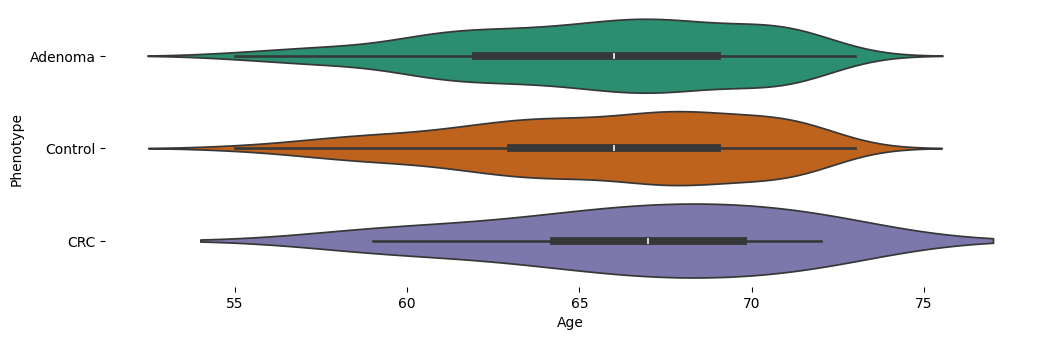

In [ ]:
# This code generates a violin plot to visualize the distribution of 'Age' across different 'Phenotype' categories.
# Each "violin" shape represents the distribution of ages within that phenotype group. A wider section of the violin indicates a higher concentration of samples at that age.
# The boxplot inside each violin shows the median (the white line), the interquartile range (the box), and potential outliers (the whiskers extending from the box).

from matplotlib import pyplot as plt # Imports the pyplot module from matplotlib for plotting.
import seaborn as sns # Imports the seaborn library for enhanced statistical visualizations
figsize = (12, 1.2 * len(merge['Phenotype'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(merge, x='Age', y='Phenotype', inner='box', palette='Dark2', hue='Phenotype', legend=False)
sns.despine(top=True, right=True, bottom=True, left=True)

# Health_status vs Chao1

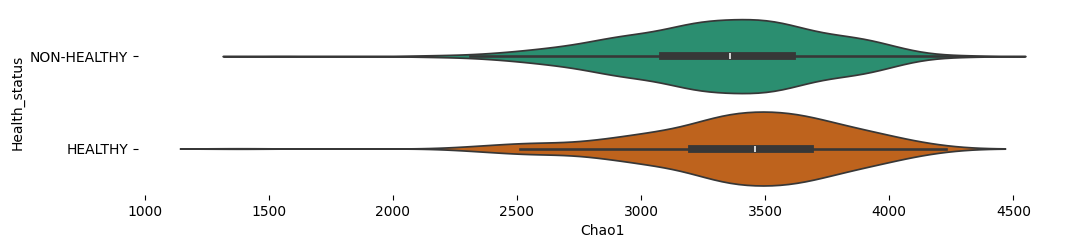

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(merge['Health_status'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(merge, x='Chao1', y='Health_status', inner='box', palette='Dark2',hue='Health_status', legend=False)
sns.despine(top=True, right=True, bottom=True, left=True)

# **Chao1 alpha diversity index across different phenotypes** (Adenoma, Control, and CRC).
# This plot is a boxplot overlaid with a stripplot

* **Boxplot:** The boxes show the distribution of Chao1 values for each phenotype group.
* **Stripplot**: The black dots represent the individual Chao1 values for each sample. This helps to show the density of data points within each phenotype and how they are distributed around the boxplot.

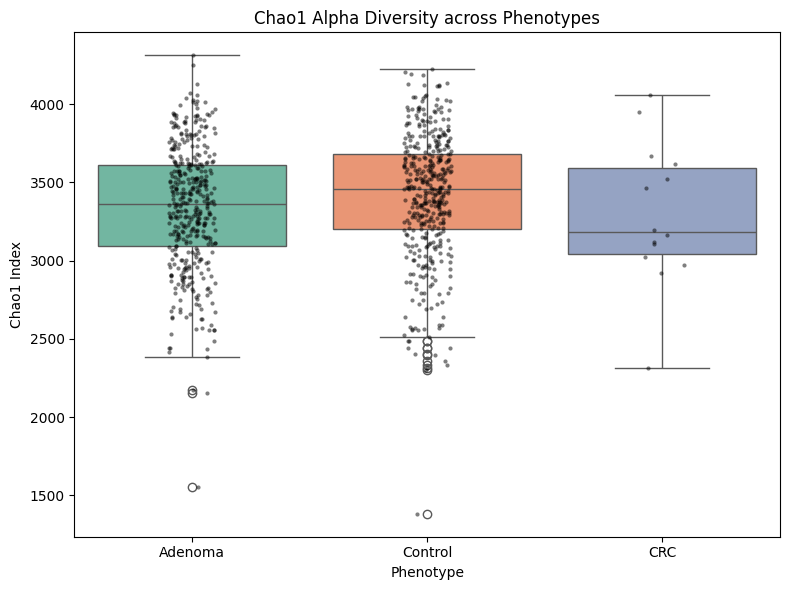

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure the merged DataFrame has columns: 'Chao1' and 'Phenotype'
# merged = pd.merge(chao1_df, metadata, left_on='Sample', right_on='Run')

plt.figure(figsize=(8,6))
sns.boxplot(x="Phenotype", y="Chao1", data=merge, palette="Set2", hue="Phenotype", legend=False)
sns.stripplot(x="Phenotype", y="Chao1", data=merge, color="black", size=3, jitter=True, alpha=0.5)

plt.title("Chao1 Alpha Diversity across Phenotypes")
plt.ylabel("Chao1 Index")
plt.xlabel("Phenotype")
plt.tight_layout()
plt.show()

In [ ]:
chao1_df.describe()
# .describe() method in pandas to generate descriptive statistics for the chao1_df DataFrame.

,Chao1
count,851.000000
mean,3372.817861
std,400.851539
min,1382.000000
25%,3138.000000
50%,3410.000000
75%,3644.500000
max,4312.000000


# **For Calculating Relative abundance**

In [ ]:
# Calculate the total abundance for each sample (column)
total_abundance_per_sample = brack_num_df.sum(axis=0)

# Calculate relative abundance by dividing each species' abundance by the total abundance for that sample
relative_abundance = brack_num_df.div(total_abundance_per_sample, axis=1)
relative_abundance

,SRR32732804,SRR32732805,SRR32732806,SRR32732807,SRR32732808,SRR32732809,SRR32732810,SRR32732811,SRR32732813,SRR32732814,...,SRR32733691,SRR32733692,SRR32733693,SRR32733694,SRR32733695,SRR32733696,SRR32733697,SRR32733698,SRR32733699,SRR32733700
Bacteroides xylanisolvens,0.113909,0.013111,0.001601,0.005864,0.040701,0.003108,0.006446,0.005832,0.038228,0.033744,...,0.010585,0.012620,0.004211,0.131616,0.016008,0.003870,0.001474,0.001737,0.003198,0.004052
Bacteroides finegoldii,0.029993,0.001164,0.000440,0.001480,0.002853,0.000246,0.001497,0.001144,0.004455,0.037332,...,0.001923,0.001231,0.006120,0.004063,0.006063,0.000660,0.000393,0.006342,0.007376,0.000616
Bacteroides ovatus,0.022260,0.006677,0.001335,0.114942,0.037007,0.002982,0.014609,0.020053,0.081394,0.015002,...,0.026171,0.016306,0.005705,0.026919,0.005844,0.010080,0.000126,0.005938,0.000974,0.008484
Bacteroides sp902362375,0.017597,0.004010,0.000368,0.002456,0.006515,0.000458,0.002307,0.003021,0.012462,0.009408,...,0.003781,0.002612,0.000948,0.006751,0.001863,0.001546,0.000100,0.000898,0.000286,0.001397
Bacteroides nordii,0.004361,0.000932,0.000217,0.004889,0.000887,0.000094,0.000879,0.000080,0.001825,0.000428,...,0.002096,0.000162,0.001311,0.000341,0.000259,0.002502,0.000070,0.000904,0.000485,0.000573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Campylobacter_D coli_B,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Helicobacter pylori_BU,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Methanobacterium sp000499765,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Campylobacter fetus,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


covert the dataframe to long format (all species in 1 sample, then all the species in next sample....)

In [ ]:
# Assuming relative_abundance is the DataFrame from the previous step
# Convert wide format to long format using melt
long_format_df = relative_abundance.reset_index().melt(
    id_vars='index',  # The column with species names (adjust if your species column has a different name)
    value_vars=relative_abundance.columns,  # Sample columns
    var_name='Run_ID',  # Name of the column for sample IDs
    value_name='RA'  # Name of the column for relative abundance
)

# Rename the 'index' column to 'species'
long_format_df = long_format_df.rename(columns={'index': 'species'})
long_format_df

,species,Run_ID,RA
0,Bacteroides xylanisolvens,SRR32732804,0.113909
1,Bacteroides finegoldii,SRR32732804,0.029993
2,Bacteroides ovatus,SRR32732804,0.022260
3,Bacteroides sp902362375,SRR32732804,0.017597
4,Bacteroides nordii,SRR32732804,0.004361
...,...,...,...
3940125,Campylobacter_D coli_B,SRR32733700,0.000000
3940126,Helicobacter pylori_BU,SRR32733700,0.000000
3940127,Methanobacterium sp000499765,SRR32733700,0.000000
3940128,Campylobacter fetus,SRR32733700,0.000000


In [ ]:
metadata

,Run,Age,Sex,BMI,Phenotype,Health_status
0,SRR32732804,64,female,25.33,Adenoma,NON-HEALTHY
1,SRR32732805,72,female,24.85,Adenoma,NON-HEALTHY
2,SRR32732806,71,female,31.79,Adenoma,NON-HEALTHY
3,SRR32732807,71,female,21.92,Control,HEALTHY
4,SRR32732808,59,female,29.53,Adenoma,NON-HEALTHY
...,...,...,...,...,...,...
892,SRR32733696,57,female,21.28,Adenoma,NON-HEALTHY
893,SRR32733697,66,female,23.29,Adenoma,NON-HEALTHY
894,SRR32733698,63,female,19.76,Control,HEALTHY
895,SRR32733699,71,female,29.12,Adenoma,NON-HEALTHY


Map this long format abundance dataframe to metadata

In [ ]:
new_df=pd.merge(long_format_df,metadata, left_on='Run_ID', right_on='Run')
new_df

,species,Run_ID,RA,Run,Age,Sex,BMI,Phenotype,Health_status
0,Bacteroides xylanisolvens,SRR32732804,0.113909,SRR32732804,64,female,25.33,Adenoma,NON-HEALTHY
1,Bacteroides finegoldii,SRR32732804,0.029993,SRR32732804,64,female,25.33,Adenoma,NON-HEALTHY
2,Bacteroides ovatus,SRR32732804,0.022260,SRR32732804,64,female,25.33,Adenoma,NON-HEALTHY
3,Bacteroides sp902362375,SRR32732804,0.017597,SRR32732804,64,female,25.33,Adenoma,NON-HEALTHY
4,Bacteroides nordii,SRR32732804,0.004361,SRR32732804,64,female,25.33,Adenoma,NON-HEALTHY
...,...,...,...,...,...,...,...,...,...
3940125,Campylobacter_D coli_B,SRR32733700,0.000000,SRR32733700,72,female,25.96,Adenoma,NON-HEALTHY
3940126,Helicobacter pylori_BU,SRR32733700,0.000000,SRR32733700,72,female,25.96,Adenoma,NON-HEALTHY
3940127,Methanobacterium sp000499765,SRR32733700,0.000000,SRR32733700,72,female,25.96,Adenoma,NON-HEALTHY
3940128,Campylobacter fetus,SRR32733700,0.000000,SRR32733700,72,female,25.96,Adenoma,NON-HEALTHY


# **Visualisation(Heatmap and barplots)**

Heatmap is used because it helps us to  visually identify which microbial species have the strongest positive or negative associations with the different health status phenotypes (Adenoma, Control, CRC) based on their relative abundance in the samples.

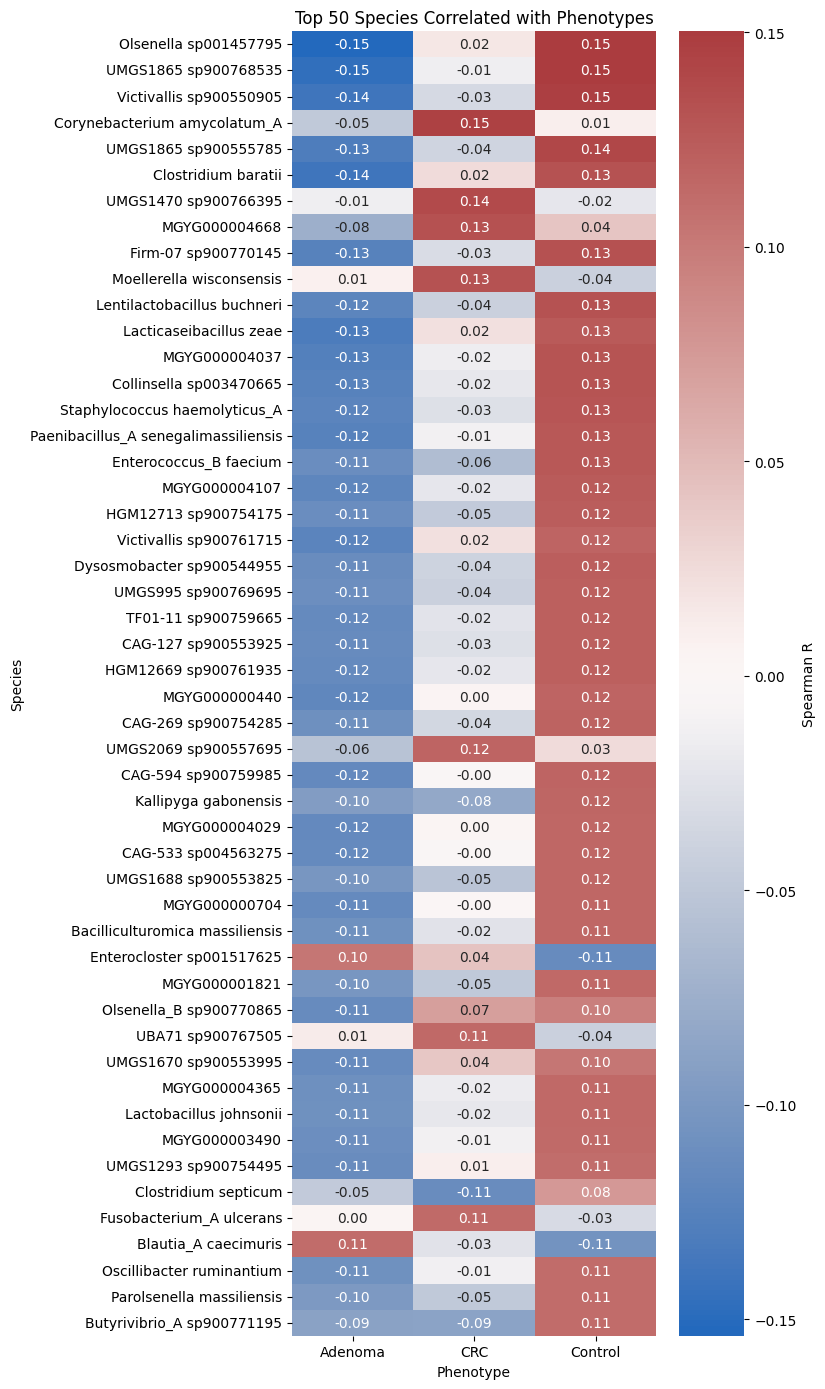

,1XD42-69 sp014287635,28L sp000177555,43-108 sp001915545,51-20 sp001917175,51-20 sp900539605,51-20 sp900542055,51-20 sp900762565,AF33-28 sp003477885,AM07-15 sp003477405,AM51-8 sp003478275,...,Zag111 sp002102825,Zag111 sp002103105,Zag111 sp003258735,Zag111 sp004558955,Zag111 sp900551965,Zag111 sp900555325,Phenotype,Adenoma,CRC,Control
Run_ID,,,,,,,,,,,,,,,,,,,,,
SRR32732804,0.000037,0.000000e+00,0.000118,0.000019,7.401053e-07,1.166547e-05,4.581604e-07,0.000063,0.000419,0.000015,...,0.000000e+00,0.000000e+00,0.000000e+00,0.0,7.753484e-07,0.000000,Adenoma,True,False,False
SRR32732805,0.000017,4.103566e-07,0.000008,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000970,0.000371,0.000022,...,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000,Adenoma,True,False,False
SRR32732806,0.000014,0.000000e+00,0.000007,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000133,0.000144,0.000028,...,0.000000e+00,2.510331e-07,1.932954e-06,0.0,0.000000e+00,0.000000,Adenoma,True,False,False
SRR32732807,0.000003,0.000000e+00,0.000007,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000054,0.000036,0.000008,...,0.000000e+00,0.000000e+00,4.594255e-07,0.0,0.000000e+00,0.000000,Control,False,False,True
SRR32732808,0.000085,4.169779e-07,0.000023,0.000000,0.000000e+00,4.725750e-07,0.000000e+00,0.000197,0.000391,0.000020,...,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000,Adenoma,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRR32733696,0.000027,0.000000e+00,0.000010,0.000028,2.848217e-07,5.354648e-06,8.345275e-06,0.000082,0.000105,0.000024,...,0.000000e+00,0.000000e+00,0.000000e+00,0.0,6.266077e-07,0.000000,Adenoma,True,False,False
SRR32733697,0.000038,3.604756e-07,0.000011,0.000000,0.000000e+00,7.209513e-07,0.000000e+00,0.000040,0.002324,0.000019,...,0.000000e+00,6.248244e-07,3.124122e-07,0.0,8.290940e-06,0.000001,Adenoma,True,False,False
SRR32733698,0.000104,4.354260e-07,0.000005,0.000000,0.000000e+00,2.419033e-07,2.806079e-06,0.000134,0.000104,0.000022,...,2.419033e-07,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000,Control,False,False,True


In [ ]:
# correlation between the relative abundance of microbial species and different phenotypes using a heatmap.


import pandas as pd # for data manipulation
import numpy as np # numerical operations,
from scipy.stats import spearmanr # for calculating Spearman correlation,
import seaborn as sns #  enhanced visualizations
import matplotlib.pyplot as plt # for plotting

# 1. Pivot to wide format
# transforms the new_df DataFrame from a "long" format to a "wide" format.
# In the wide format, each row represents a sample (Run_ID), each column represents a species,
# and the values are their relative abundances (RA
# fill_value=0 handles any missing values by replacing them with 0.
species_wide = new_df.pivot_table(index="Run_ID", columns="species", values="RA", fill_value=0)

# Add phenotype info
#  It extracts the "Phenotype" column from new_df
# (dropping duplicate Run_ID entries to get one phenotype per sample)
# and joins it to the species_wide DataFrame.
meta = new_df.drop_duplicates("Run_ID").set_index("Run_ID")[["Phenotype"]]
species_wide = species_wide.join(meta)

# 2. One-hot encode phenotypes (dummy vars)
# It converts the categorical "Phenotype" column into numerical dummy variables using pd.get_dummies()
# This is necessary because correlation calculations require numerical data.
# A new column is created for each unique phenotype with a value of 1 if the sample belongs to that phenotype and 0 otherwise.
phenotype_dummies = pd.get_dummies(species_wide["Phenotype"])
species_wide = species_wide.join(phenotype_dummies)

# 3. Spearman correlation: each species vs each phenotype dummy
# Spearman correlation is used here because it assesses the monotonic relationship between variables,
# which is suitable for relative abundance data that might not have a linear relationship.
# The results are stored in a list of lists (cor_results).
meta_vars = phenotype_dummies.columns.tolist()
cor_results = []
for sp in species_wide.columns.difference(["Phenotype"] + meta_vars):
    for var in meta_vars:
        corr, pval = spearmanr(species_wide[sp], species_wide[var], nan_policy="omit")
        cor_results.append([sp, var, corr, pval])

cor_df = pd.DataFrame(cor_results, columns=["Species", "Phenotype", "SpearmanR", "pval"])

# 4. Select top 50 species by absolute correlation with any phenotype
# It identifies the top 50 species
# that have the highest absolute Spearman correlation with any of the phenotypes.
top_species = (
    cor_df.groupby("Species")["SpearmanR"]
    .apply(lambda x: x.abs().max())
    .sort_values(ascending=False)
    .head(50)
    .index
)

# It reshapes the correlation results (cor_df) into a pivot table (heatmap_df) where
# species are rows, phenotypes are columns, and the values are the calculated Spearman correlation coefficients.
# It then filters this table to include only the top_species.
heatmap_df = cor_df.pivot(index="Species", columns="Phenotype", values="SpearmanR").loc[top_species]

# 5. Heatmap
plt.figure(figsize=(8, 14))
sns.heatmap(heatmap_df, cmap="vlag", center=0, annot=True, fmt=".2f",
            cbar_kws={"label": "Spearman R"})
plt.title("Top 50 Species Correlated with Phenotypes")
plt.ylabel("Species")
plt.xlabel("Phenotype")
plt.tight_layout()
plt.show()

species_wide


Stacked Barplot is used here to see how the top 10 most abundant species are distributed.
* whether certain microbial species are more dominant in one health status compared to another
* The height of each bar = total relative abundance in that group.
* The colored segments inside the bar = contribution of each species.

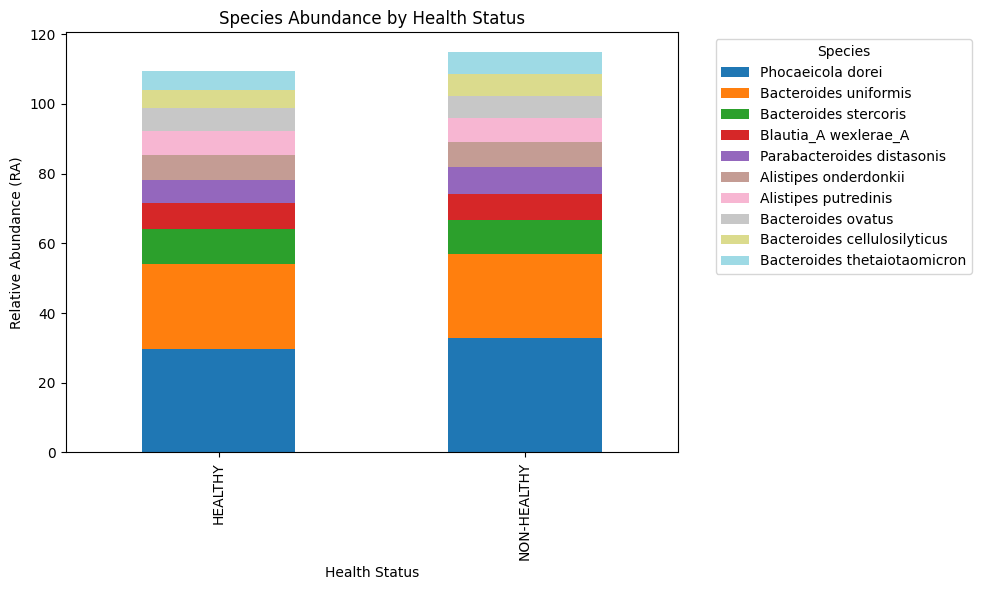

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming new_df is the merged DataFrame
# Group by Health_status and species, summing the RA (relative abundance)
aggregated_df = new_df.groupby(['Health_status', 'species'])['RA'].sum().unstack().fillna(0)

# Select top N species by total abundance for clarity (e.g., top 10 species)
# aggregated_df.sum(axis=0) → total abundance of each species across all health statuses.
# .nlargest(top_n) → picks the top 10 most abundant species.
# plot_df → keeps only those top species for plotting (removes rare species for clarity).
top_n = 10
top_species = aggregated_df.sum(axis=0).nlargest(top_n).index
plot_df = aggregated_df[top_species]

# Create a stacked bar plot
plot_df.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab20')

# Customize the plot
plt.title('Species Abundance by Health Status')
plt.xlabel('Health Status')
plt.ylabel('Relative Abundance (RA)')
plt.legend(title='Species', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()

This Stacked barplot checkhs whether certain microbial species are more dominant in one health Phenotype compared to another

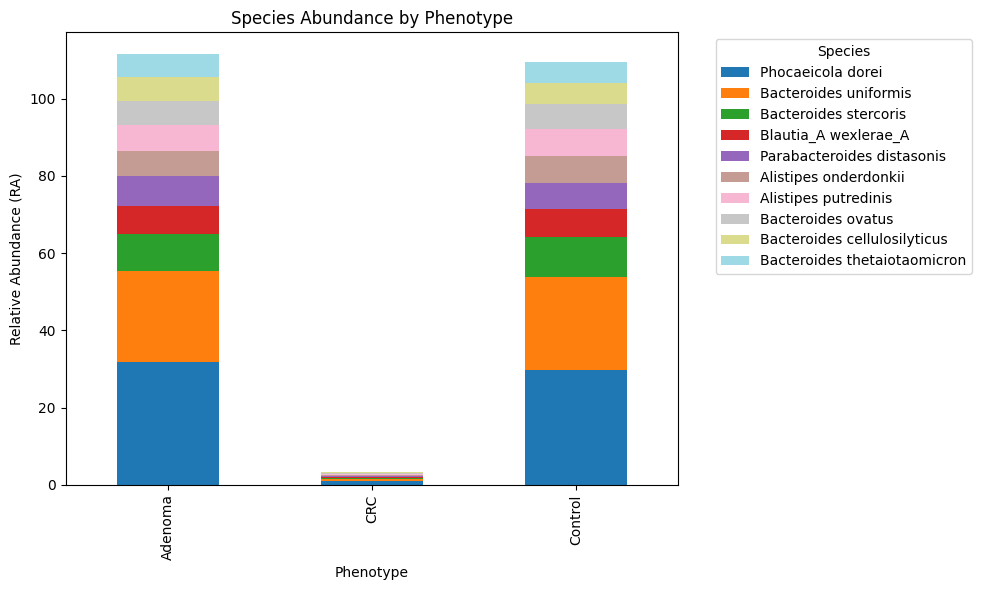

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming new_df is the merged DataFrame
# Group by Phenotype and species, summing the RA (relative abundance)
aggregated_df = new_df.groupby(['Phenotype', 'species'])['RA'].sum().unstack().fillna(0)

# Select top N species by total abundance for clarity (e.g., top 10 species)
top_n = 10
top_species = aggregated_df.sum(axis=0).nlargest(top_n).index
plot_df = aggregated_df[top_species]

# Create a stacked bar plot
plot_df.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab20')

# Customize the plot
plt.title('Species Abundance by Phenotype')
plt.xlabel('Phenotype')
plt.ylabel('Relative Abundance (RA)')
plt.legend(title='Species', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()

# **From here we start to build models**

In [ ]:
brack_num_df

,SRR32732804,SRR32732805,SRR32732806,SRR32732807,SRR32732808,SRR32732809,SRR32732810,SRR32732811,SRR32732813,SRR32732814,...,SRR32733691,SRR32733692,SRR32733693,SRR32733694,SRR32733695,SRR32733696,SRR32733697,SRR32733698,SRR32733699,SRR32733700
Bacteroides xylanisolvens,3232092,383411,63773,204219,1464145,106125,274709,232809,1179323,1384180,...,515110,483829,192112,5141498,885775,135885,61316,71793,93594,195599
Bacteroides finegoldii,851026,34049,17527,51546,102643,8398,63793,45654,137449,1531351,...,93588,47202,279165,158712,335456,23166,16353,262154,215860,29743
Bacteroides ovatus,631604,195250,53197,4002970,1331243,101814,622567,800555,2510966,615396,...,1273619,625157,260231,1051579,323376,353907,5248,245473,28510,409488
Bacteroides sp902362375,499300,117253,14670,85542,234381,15628,98329,120593,384453,385922,...,184016,100142,43224,263730,103097,54273,4176,37103,8360,67425
Bacteroides nordii,123744,27246,8643,170255,31901,3207,37458,3211,56297,17552,...,102020,6228,59793,13324,14348,87856,2923,37388,14192,27676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Campylobacter_D coli_B,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Helicobacter pylori_BU,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Methanobacterium sp000499765,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Campylobacter fetus,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Step 1: Convert counts to presence/absence (1 if count > 0, else 0)
presence_absence = (brack_num_df > 0).astype(int)

presence_absence

,SRR32732804,SRR32732805,SRR32732806,SRR32732807,SRR32732808,SRR32732809,SRR32732810,SRR32732811,SRR32732813,SRR32732814,...,SRR32733691,SRR32733692,SRR32733693,SRR32733694,SRR32733695,SRR32733696,SRR32733697,SRR32733698,SRR32733699,SRR32733700
Bacteroides xylanisolvens,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Bacteroides finegoldii,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Bacteroides ovatus,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Bacteroides sp902362375,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Bacteroides nordii,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Campylobacter_D coli_B,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Helicobacter pylori_BU,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Methanobacterium sp000499765,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Campylobacter fetus,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**It shows prevalence thresholds, i.e how much species are present in perticular % of total sample**

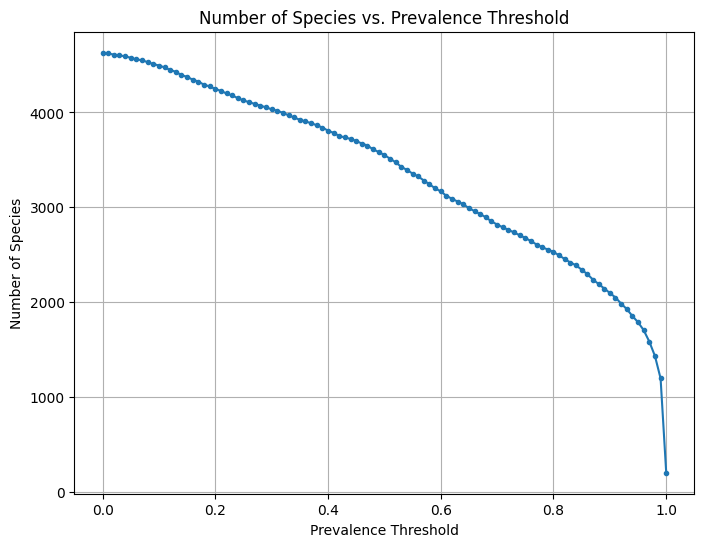

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Step 2: Calculate prevalence (proportion of samples where species is present)
prevalence = presence_absence.mean(axis=1)  # Mean across samples (columns)

# Step 3: Count species above prevalence thresholds
thresholds = np.arange(0, 1.01, 0.01)  # Prevalence thresholds from 0 to 1
species_counts = [sum(prevalence >= t) for t in thresholds]  # Number of species above each threshold

# Step 4: Plot the graph
plt.figure(figsize=(8, 6))
plt.plot(thresholds, species_counts, marker='.', linestyle='-')
plt.xlabel('Prevalence Threshold')
plt.ylabel('Number of Species')
plt.title('Number of Species vs. Prevalence Threshold')
plt.grid(True)
plt.show()

**Here we have tried to filter the data based on their prevalence**
* **Initially we check for the species which are present in greater than 20% of Total sample**
* **Then checked for species greater than 90% prevalance**

Species with prevalence > 0.2:
                           Prevalence
Bacteroides xylanisolvens    0.994125
Bacteroides finegoldii       0.997650
Bacteroides ovatus           0.995300
Bacteroides sp902362375      0.994125
Bacteroides nordii           0.995300
...                               ...
Enterococcus_C dispar        0.213866
MGYG000000342                0.278496
HGM20899 sp900767005         0.272620
Enterovibrio hollisae        0.239718
Timonella senegalensis       0.220917

[4248 rows x 1 columns]


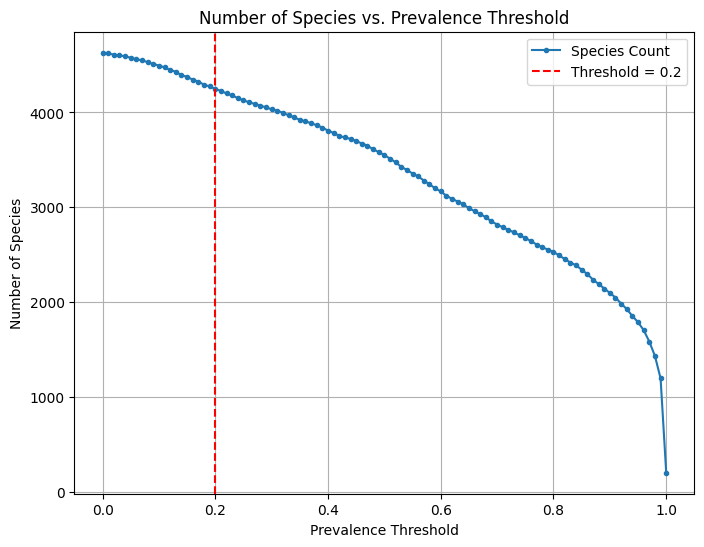

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assume brack_num_df is your DataFrame
# Example: brack_num_df = pd.read_csv('your_file.csv', index_col=0)

# Step 1: Convert counts to presence/absence (1 if count > 0, else 0)
presence_absence = (brack_num_df > 0).astype(int)

# Step 2: Calculate prevalence (proportion of samples where species is present)
prevalence = presence_absence.mean(axis=1)

# Step 3: Filter species with prevalence > 0.2
threshold = 0.2 # Keeps only species present in more than 20% of samples.
selected_species = prevalence[prevalence > threshold] # This helps us identify the more common/core species.

# Step 4: Print selected species and their prevalence
print(f"Species with prevalence > {threshold}:")
print(selected_species.to_frame(name='Prevalence')) # Shows the species that pass the threshold, along with their prevalence values

# Step 5: Plot number of species vs. prevalence threshold with 20% line
thresholds = np.arange(0, 1.01, 0.01)
species_counts = [sum(prevalence >= t) for t in thresholds]
# For each threshold (0 to 1), count how many species are present in at least that fraction of samples.

plt.figure(figsize=(8, 6))
plt.plot(thresholds, species_counts, marker='.', linestyle='-', label='Species Count')
plt.axvline(x=threshold, color='red', linestyle='--', label=f'Threshold = {threshold}')
# Draws a vertical red dashed line at 0.2 (20% prevalence).
# This highlights the cutoff you applied.
plt.xlabel('Prevalence Threshold')
plt.ylabel('Number of Species')
plt.title('Number of Species vs. Prevalence Threshold')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Foer greater than 90% prevalence

import pandas as pd

# Assume brack_num_df is your DataFrame
# Example: brack_num_df = pd.read_csv('your_file.csv', index_col=0)

# Step 1: Convert counts to presence/absence (1 if count > 0, else 0)
presence_absence = (brack_num_df > 0).astype(int)

# Step 2: Calculate prevalence (proportion of samples where species is present)
prevalence = presence_absence.mean(axis=1)

# Step 3: Filter species with prevalence
threshold = 0.9
selected_species = prevalence[prevalence > threshold].index

# Step 4: Filter the original DataFrame to include only selected species
filtered_df = brack_num_df.loc[selected_species]

# Step 5: Output the filtered table
print(f"Filtered table for species with prevalence > {threshold}:")
print(filtered_df)

# Optionally, save the filtered table to a CSV file
# filtered_df.to_csv('filtered_species_prevalence_above_10_percent.csv')

Filtered table for species with prevalence > 0.9:
0                          SRR32732804  SRR32732805  SRR32732806  SRR32732807  \
Bacteroides xylanisolvens      3232092       383411        63773       204219   
Bacteroides finegoldii          851026        34049        17527        51546   
Bacteroides ovatus              631604       195250        53197      4002970   
Bacteroides sp902362375         499300       117253        14670        85542   
Bacteroides nordii              123744        27246         8643       170255   
...                                ...          ...          ...          ...   
Kosakonia cowanii                    0          236            0          791   
Leptotrichia wadei                   0           40          201           84   
Bruticola sp004554425                0          238            0          416   
MGYG000004312                        0          113          281           15   
Prevotella sp900769055               0            0        

In [ ]:
# To see the number of speceies from brack_num_df dataframe which has passed the 90 percent Threshold
brack_num_df_9=filtered_df
brack_num_df_9

,SRR32732804,SRR32732805,SRR32732806,SRR32732807,SRR32732808,SRR32732809,SRR32732810,SRR32732811,SRR32732813,SRR32732814,...,SRR32733691,SRR32733692,SRR32733693,SRR32733694,SRR32733695,SRR32733696,SRR32733697,SRR32733698,SRR32733699,SRR32733700
Bacteroides xylanisolvens,3232092,383411,63773,204219,1464145,106125,274709,232809,1179323,1384180,...,515110,483829,192112,5141498,885775,135885,61316,71793,93594,195599
Bacteroides finegoldii,851026,34049,17527,51546,102643,8398,63793,45654,137449,1531351,...,93588,47202,279165,158712,335456,23166,16353,262154,215860,29743
Bacteroides ovatus,631604,195250,53197,4002970,1331243,101814,622567,800555,2510966,615396,...,1273619,625157,260231,1051579,323376,353907,5248,245473,28510,409488
Bacteroides sp902362375,499300,117253,14670,85542,234381,15628,98329,120593,384453,385922,...,184016,100142,43224,263730,103097,54273,4176,37103,8360,67425
Bacteroides nordii,123744,27246,8643,170255,31901,3207,37458,3211,56297,17552,...,102020,6228,59793,13324,14348,87856,2923,37388,14192,27676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Kosakonia cowanii,0,236,0,791,389,94,102,305,371,39,...,1006,370,19,22,278,14,487,313,228,666
Leptotrichia wadei,0,40,201,84,87,25,55,54,89,0,...,309,157,12,35,53,0,146,15,27,178
Bruticola sp004554425,0,238,0,416,279,102,655,340,1418,211,...,40,32,849,0,553,393,225,168,175,156
MGYG000004312,0,113,281,15,0,634,135,273,46,215,...,693,12,82,127,100,30,0,362,157,34


* Now we take the above 90% prevalence dataframe, and add a small pseudo-count (1) to avoid problems with zeros (Because log 0 is undefined), then calculates the geometric mean of abundances for each sample (column).
* Using this, it applies the Centered Log-Ratio (CLR) transformation, which computes the log of each species’ abundance divided by the sample’s geometric mean.
* This converts the raw counts into log-ratios, making the data more suitable for downstream analyses .
* The final output is a new DataFrame (clr_transformed_df) with CLR-transformed values.

* CLR transformation is used in microbiome analysis because species counts are compositional (only relative, not absolute). CLR converts them into log-ratios, which removes the bias of total sequencing depth and allows fair comparison of species abundances across samples.

In [ ]:
from scipy.stats import gmean
# Step 1: Handle zeros (add a small pseudo-count to avoid log(0))
pseudo_count = 1
brack_num_df_no_zeros = brack_num_df_9 + pseudo_count

# Step 2: Compute the geometric mean for each sample (column)
# Geometric mean is calculated across taxa for each sample
geometric_means = brack_num_df_no_zeros.apply(gmean, axis=0)

# Step 3: Apply CLR transformation
# CLR = log(x / g(x)), where g(x) is the geometric mean of the sample
clr_transformed = np.log(brack_num_df_no_zeros.divide(geometric_means, axis=1))

# Step 4: Output the transformed DataFrame
clr_transformed_df = pd.DataFrame(clr_transformed, index=brack_num_df_9.index, columns=brack_num_df_9.columns)

# Display the first few rows of the CLR-transformed DataFrame
print(clr_transformed_df.head())

0                          SRR32732804  SRR32732805  SRR32732806  SRR32732807  \
Bacteroides xylanisolvens     8.806365     6.195401     4.837280     6.483334   
Bacteroides finegoldii        7.471924     3.774120     3.545734     5.106630   
Bacteroides ovatus            7.173744     5.520576     4.655955     9.458928   
Bacteroides sp902362375       6.938689     5.010633     3.367807     5.613155   
Bacteroides nordii            5.543703     3.551234     2.838800     6.301439   

0                          SRR32732808  SRR32732809  SRR32732810  SRR32732811  \
Bacteroides xylanisolvens     7.441161     4.678445     5.619644     5.716022   
Bacteroides finegoldii        4.783400     2.141931     4.159587     4.086912   
Bacteroides ovatus            7.346002     4.636975     6.437780     6.951106   
Bacteroides sp902362375       5.609086     2.762946     4.592257     5.058229   
Bacteroides nordii            3.614802     1.179466     3.627175     1.432693   

0                         

In [ ]:
clr_transformed_df


,SRR32732804,SRR32732805,SRR32732806,SRR32732807,SRR32732808,SRR32732809,SRR32732810,SRR32732811,SRR32732813,SRR32732814,...,SRR32733691,SRR32733692,SRR32733693,SRR32733694,SRR32733695,SRR32733696,SRR32733697,SRR32733698,SRR32733699,SRR32733700
Bacteroides xylanisolvens,8.806365,6.195401,4.837280,6.483334,7.441161,4.678445,5.619644,5.716022,8.379265,8.073861,...,6.451183,6.930319,4.857946,9.247631,6.382949,5.152854,4.444417,4.029992,5.135614,5.348019
Bacteroides finegoldii,7.471924,3.774120,3.545734,5.106630,4.783400,2.141931,4.159587,4.086912,6.229828,8.174904,...,4.745713,4.603043,5.231669,5.769628,5.411979,3.383767,3.122833,5.325127,5.971271,3.464574
Bacteroides ovatus,7.173744,5.520576,4.655955,9.458928,7.346002,4.636975,6.437780,6.951106,9.134991,7.263265,...,7.356419,7.186590,5.161436,7.660580,5.375304,6.110075,1.986398,5.259383,3.946927,6.086857
Bacteroides sp902362375,6.938689,5.010633,3.367807,5.613155,5.609086,2.762946,4.592257,5.058229,7.258392,6.796635,...,5.421828,5.355185,3.366281,6.277461,4.232165,4.235083,1.757954,3.369916,2.720215,4.282978
Bacteroides nordii,5.543703,3.551234,2.838800,6.301439,3.614802,1.179466,3.627175,1.432693,5.337227,3.706222,...,4.831979,2.577802,3.690767,3.292173,2.260165,4.716748,1.401313,3.377568,3.249386,3.392549
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Kosakonia cowanii,-6.182275,-1.193405,-6.225821,0.930942,-0.789475,-2.340061,-2.269099,-0.918371,0.317707,-2.377878,...,0.213776,-0.242967,-4.312161,-3.069730,-1.680059,-3.958667,-0.389080,-1.402171,-0.877397,-0.333018
Leptotrichia wadei,-6.182275,-2.947893,-0.917553,-1.300968,-2.278285,-3.635841,-2.878476,-2.634623,-1.101377,-6.066758,...,-0.964383,-1.096575,-4.742944,-2.621705,-3.322286,-6.666717,-1.588962,-4.378975,-2.978914,-1.648423
Bruticola sp004554425,-6.182275,-1.185001,-6.225821,0.289467,-1.120832,-2.259208,-0.417667,-0.810074,1.656521,-0.710172,...,-2.987383,-2.662662,-0.562657,-6.205224,-0.994106,-0.690366,-1.158860,-2.021665,-1.140635,-1.779563
MGYG000004312,-6.182275,-1.925266,-0.583914,-2.971031,-6.755622,-0.440312,-1.991173,-1.028828,-1.751039,-0.691479,...,-0.158483,-3.594220,-2.889053,-1.353194,-2.696150,-3.232730,-6.579395,-1.257161,-1.248524,-3.280460


In [ ]:
otu_table=clr_transformed_df.T # transpose the matrix row for sample and columns for species
otu_table

,Bacteroides xylanisolvens,Bacteroides finegoldii,Bacteroides ovatus,Bacteroides sp902362375,Bacteroides nordii,Bacteroides thetaiotaomicron,Bacteroides acidifaciens,Bacteroides fragilis_A,Bacteroides sp900765785,Bacteroides faecis,...,Streptococcus mutans,CAG-451 sp900760545,MGYG000004829,MGYG000004749,Azonexus sp900549295,Kosakonia cowanii,Leptotrichia wadei,Bruticola sp004554425,MGYG000004312,Prevotella sp900769055
0,,,,,,,,,,,,,,,,,,,,,
SRR32732804,8.806365,7.471924,7.173744,6.938689,5.543703,5.570383,5.380088,5.130246,5.118385,5.028775,...,-6.182275,-6.182275,-6.182275,-6.182275,-6.182275,-6.182275,-6.182275,-6.182275,-6.182275,-6.182275
SRR32732805,6.195401,3.774120,5.520576,5.010633,3.551234,5.181836,4.437172,2.644458,3.991267,2.951804,...,-3.828252,-1.201879,-2.207118,-4.022408,-1.383350,-1.193405,-2.947893,-1.185001,-1.925266,-6.661465
SRR32732806,4.837280,3.545734,4.655955,3.367807,2.838800,9.772121,5.695259,1.608967,6.879258,7.053572,...,-3.660872,-1.107827,-0.231860,-2.614903,-2.614903,-6.225821,-0.917553,-6.225821,-0.583914,-6.225821
SRR32732807,6.483334,5.106630,9.458928,5.613155,6.301439,4.799325,6.114512,4.828415,6.527403,4.389829,...,-2.080058,-1.148499,-1.495124,-0.816366,1.907025,0.930942,-1.300968,0.289467,-2.971031,-0.420609
SRR32732808,7.441161,4.783400,7.346002,5.609086,3.614802,3.126642,5.095710,1.950206,4.405218,2.714155,...,-3.983033,-2.661277,-1.238169,-2.994422,-0.917891,-0.789475,-2.278285,-1.120832,-6.755622,-0.781812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRR32733696,5.152854,3.383767,6.110075,4.235083,4.716748,7.470711,3.182631,6.903389,4.999650,5.055318,...,-3.722278,-3.488663,-1.966237,-2.272268,-0.794600,-3.958667,-6.666717,-0.690366,-3.232730,-2.349229
SRR32733697,4.444417,3.122833,1.986398,1.757954,1.401313,7.918664,3.542786,1.053975,4.627155,4.512683,...,-3.145408,-1.306395,-0.780302,-3.024047,-1.065966,-0.389080,-1.588962,-1.158860,-6.579395,-6.579395
SRR32733698,4.029992,5.325127,5.259383,3.369916,3.377568,4.235708,2.576141,1.769627,2.613236,2.911147,...,-7.151564,-0.657810,-2.782116,-2.253724,0.363781,-1.402171,-4.378975,-2.021665,-1.257161,-3.200320


This code saves the index values into a new column called Run_ID.

In [ ]:
otu_table["Run_ID"]=otu_table.index
otu_table

,Bacteroides xylanisolvens,Bacteroides finegoldii,Bacteroides ovatus,Bacteroides sp902362375,Bacteroides nordii,Bacteroides thetaiotaomicron,Bacteroides acidifaciens,Bacteroides fragilis_A,Bacteroides sp900765785,Bacteroides faecis,...,CAG-451 sp900760545,MGYG000004829,MGYG000004749,Azonexus sp900549295,Kosakonia cowanii,Leptotrichia wadei,Bruticola sp004554425,MGYG000004312,Prevotella sp900769055,Run_ID
0,,,,,,,,,,,,,,,,,,,,,
SRR32732804,8.806365,7.471924,7.173744,6.938689,5.543703,5.570383,5.380088,5.130246,5.118385,5.028775,...,-6.182275,-6.182275,-6.182275,-6.182275,-6.182275,-6.182275,-6.182275,-6.182275,-6.182275,SRR32732804
SRR32732805,6.195401,3.774120,5.520576,5.010633,3.551234,5.181836,4.437172,2.644458,3.991267,2.951804,...,-1.201879,-2.207118,-4.022408,-1.383350,-1.193405,-2.947893,-1.185001,-1.925266,-6.661465,SRR32732805
SRR32732806,4.837280,3.545734,4.655955,3.367807,2.838800,9.772121,5.695259,1.608967,6.879258,7.053572,...,-1.107827,-0.231860,-2.614903,-2.614903,-6.225821,-0.917553,-6.225821,-0.583914,-6.225821,SRR32732806
SRR32732807,6.483334,5.106630,9.458928,5.613155,6.301439,4.799325,6.114512,4.828415,6.527403,4.389829,...,-1.148499,-1.495124,-0.816366,1.907025,0.930942,-1.300968,0.289467,-2.971031,-0.420609,SRR32732807
SRR32732808,7.441161,4.783400,7.346002,5.609086,3.614802,3.126642,5.095710,1.950206,4.405218,2.714155,...,-2.661277,-1.238169,-2.994422,-0.917891,-0.789475,-2.278285,-1.120832,-6.755622,-0.781812,SRR32732808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRR32733696,5.152854,3.383767,6.110075,4.235083,4.716748,7.470711,3.182631,6.903389,4.999650,5.055318,...,-3.488663,-1.966237,-2.272268,-0.794600,-3.958667,-6.666717,-0.690366,-3.232730,-2.349229,SRR32733696
SRR32733697,4.444417,3.122833,1.986398,1.757954,1.401313,7.918664,3.542786,1.053975,4.627155,4.512683,...,-1.306395,-0.780302,-3.024047,-1.065966,-0.389080,-1.588962,-1.158860,-6.579395,-6.579395,SRR32733697
SRR32733698,4.029992,5.325127,5.259383,3.369916,3.377568,4.235708,2.576141,1.769627,2.613236,2.911147,...,-0.657810,-2.782116,-2.253724,0.363781,-1.402171,-4.378975,-2.021665,-1.257161,-3.200320,SRR32733698


* Resets the index → replaces the current row labels with a fresh default 0, 1, 2, ….

* drop=True → tells pandas not to add the old index as a new column (just throw it away).

In [ ]:
otu_table = otu_table.reset_index(drop=True)
otu_table

,Bacteroides xylanisolvens,Bacteroides finegoldii,Bacteroides ovatus,Bacteroides sp902362375,Bacteroides nordii,Bacteroides thetaiotaomicron,Bacteroides acidifaciens,Bacteroides fragilis_A,Bacteroides sp900765785,Bacteroides faecis,...,CAG-451 sp900760545,MGYG000004829,MGYG000004749,Azonexus sp900549295,Kosakonia cowanii,Leptotrichia wadei,Bruticola sp004554425,MGYG000004312,Prevotella sp900769055,Run_ID
0,8.806365,7.471924,7.173744,6.938689,5.543703,5.570383,5.380088,5.130246,5.118385,5.028775,...,-6.182275,-6.182275,-6.182275,-6.182275,-6.182275,-6.182275,-6.182275,-6.182275,-6.182275,SRR32732804
1,6.195401,3.774120,5.520576,5.010633,3.551234,5.181836,4.437172,2.644458,3.991267,2.951804,...,-1.201879,-2.207118,-4.022408,-1.383350,-1.193405,-2.947893,-1.185001,-1.925266,-6.661465,SRR32732805
2,4.837280,3.545734,4.655955,3.367807,2.838800,9.772121,5.695259,1.608967,6.879258,7.053572,...,-1.107827,-0.231860,-2.614903,-2.614903,-6.225821,-0.917553,-6.225821,-0.583914,-6.225821,SRR32732806
3,6.483334,5.106630,9.458928,5.613155,6.301439,4.799325,6.114512,4.828415,6.527403,4.389829,...,-1.148499,-1.495124,-0.816366,1.907025,0.930942,-1.300968,0.289467,-2.971031,-0.420609,SRR32732807
4,7.441161,4.783400,7.346002,5.609086,3.614802,3.126642,5.095710,1.950206,4.405218,2.714155,...,-2.661277,-1.238169,-2.994422,-0.917891,-0.789475,-2.278285,-1.120832,-6.755622,-0.781812,SRR32732808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
846,5.152854,3.383767,6.110075,4.235083,4.716748,7.470711,3.182631,6.903389,4.999650,5.055318,...,-3.488663,-1.966237,-2.272268,-0.794600,-3.958667,-6.666717,-0.690366,-3.232730,-2.349229,SRR32733696
847,4.444417,3.122833,1.986398,1.757954,1.401313,7.918664,3.542786,1.053975,4.627155,4.512683,...,-1.306395,-0.780302,-3.024047,-1.065966,-0.389080,-1.588962,-1.158860,-6.579395,-6.579395,SRR32733697
848,4.029992,5.325127,5.259383,3.369916,3.377568,4.235708,2.576141,1.769627,2.613236,2.911147,...,-0.657810,-2.782116,-2.253724,0.363781,-1.402171,-4.378975,-2.021665,-1.257161,-3.200320,SRR32733698
849,5.135614,5.971271,3.946927,2.720215,3.249386,6.452697,4.166169,1.524065,4.519263,4.044686,...,-1.112622,-2.460971,-2.379293,-0.042022,-0.877397,-2.978914,-1.140635,-1.248524,-0.499978,SRR32733699


In [ ]:
# Read metadata and saving it as metadata_df
import pandas as pd
metadata_df=pd.read_csv('/content/drive/MyDrive/metadata.csv',sep=",")
metadata_df

,Run,Age,Sex,BMI,Phenotype,Health_status
0,SRR32732804,64,female,25.33,Adenoma,NON-HEALTHY
1,SRR32732805,72,female,24.85,Adenoma,NON-HEALTHY
2,SRR32732806,71,female,31.79,Adenoma,NON-HEALTHY
3,SRR32732807,71,female,21.92,Control,HEALTHY
4,SRR32732808,59,female,29.53,Adenoma,NON-HEALTHY
...,...,...,...,...,...,...
892,SRR32733696,57,female,21.28,Adenoma,NON-HEALTHY
893,SRR32733697,66,female,23.29,Adenoma,NON-HEALTHY
894,SRR32733698,63,female,19.76,Control,HEALTHY
895,SRR32733699,71,female,29.12,Adenoma,NON-HEALTHY


# Phenotype vs BMI (violin plot)

This plot compares BMI distributions across different phenotypes in our dataset.

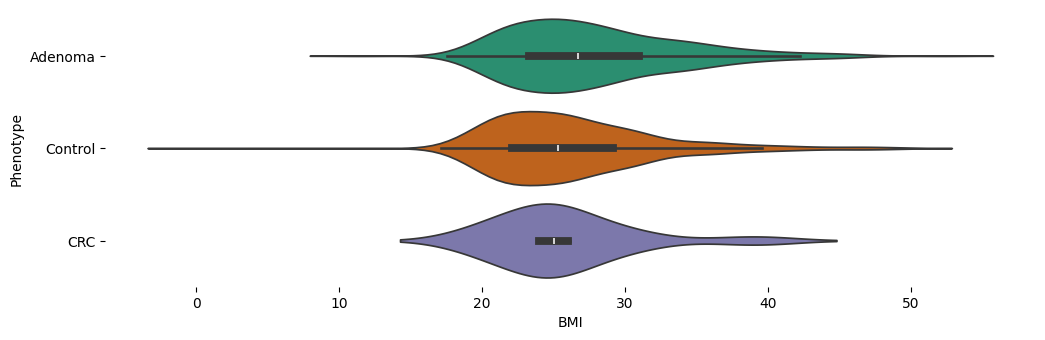

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(metadata_df['Phenotype'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(metadata_df, x='BMI', y='Phenotype', inner='box', palette='Dark2', hue = "Phenotype", legend = False)
sns.despine(top=True, right=True, bottom=True, left=True)

# Health_Status (Horizontal Barchart)

This plot shows the number of samples in each Health_status category as horizontal bars.

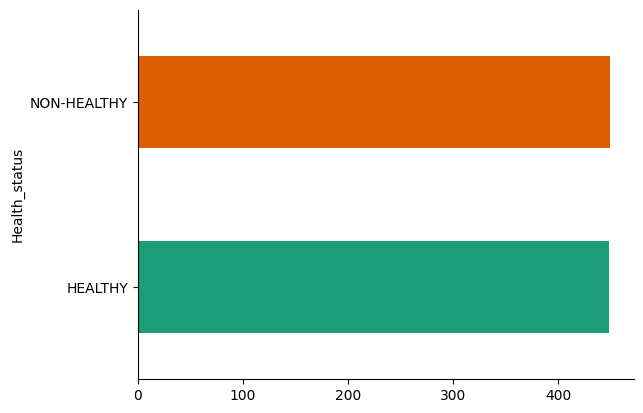

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
metadata_df.groupby('Health_status').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

* Here we are adding a  new column called Class_Label.
* Rows where Health_status = "HEALTHY" → get 1 and all other statuses → get 0.

This code turns our categorical Health_status into a binary numeric labels which is very useful for machine learning models.

In [ ]:
metadata_df['Class_Label'] = metadata_df['Health_status'].apply(lambda x: 1 if x == 'HEALTHY' else 0)
print(metadata_df.head())

           Run  Age     Sex    BMI Phenotype Health_status  Class_Label
0  SRR32732804   64  female  25.33   Adenoma   NON-HEALTHY            0
1  SRR32732805   72  female  24.85   Adenoma   NON-HEALTHY            0
2  SRR32732806   71  female  31.79   Adenoma   NON-HEALTHY            0
3  SRR32732807   71  female  21.92   Control       HEALTHY            1
4  SRR32732808   59  female  29.53   Adenoma   NON-HEALTHY            0


In [ ]:
# Now meerge our clr transformed with otu table with metadata

merged_df = pd.merge(otu_table, metadata_df, left_on='Run_ID', right_on="Run")
merged_df

,Bacteroides xylanisolvens,Bacteroides finegoldii,Bacteroides ovatus,Bacteroides sp902362375,Bacteroides nordii,Bacteroides thetaiotaomicron,Bacteroides acidifaciens,Bacteroides fragilis_A,Bacteroides sp900765785,Bacteroides faecis,...,MGYG000004312,Prevotella sp900769055,Run_ID,Run,Age,Sex,BMI,Phenotype,Health_status,Class_Label
0,8.806365,7.471924,7.173744,6.938689,5.543703,5.570383,5.380088,5.130246,5.118385,5.028775,...,-6.182275,-6.182275,SRR32732804,SRR32732804,64,female,25.33,Adenoma,NON-HEALTHY,0
1,6.195401,3.774120,5.520576,5.010633,3.551234,5.181836,4.437172,2.644458,3.991267,2.951804,...,-1.925266,-6.661465,SRR32732805,SRR32732805,72,female,24.85,Adenoma,NON-HEALTHY,0
2,4.837280,3.545734,4.655955,3.367807,2.838800,9.772121,5.695259,1.608967,6.879258,7.053572,...,-0.583914,-6.225821,SRR32732806,SRR32732806,71,female,31.79,Adenoma,NON-HEALTHY,0
3,6.483334,5.106630,9.458928,5.613155,6.301439,4.799325,6.114512,4.828415,6.527403,4.389829,...,-2.971031,-0.420609,SRR32732807,SRR32732807,71,female,21.92,Control,HEALTHY,1
4,7.441161,4.783400,7.346002,5.609086,3.614802,3.126642,5.095710,1.950206,4.405218,2.714155,...,-6.755622,-0.781812,SRR32732808,SRR32732808,59,female,29.53,Adenoma,NON-HEALTHY,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
846,5.152854,3.383767,6.110075,4.235083,4.716748,7.470711,3.182631,6.903389,4.999650,5.055318,...,-3.232730,-2.349229,SRR32733696,SRR32733696,57,female,21.28,Adenoma,NON-HEALTHY,0
847,4.444417,3.122833,1.986398,1.757954,1.401313,7.918664,3.542786,1.053975,4.627155,4.512683,...,-6.579395,-6.579395,SRR32733697,SRR32733697,66,female,23.29,Adenoma,NON-HEALTHY,0
848,4.029992,5.325127,5.259383,3.369916,3.377568,4.235708,2.576141,1.769627,2.613236,2.911147,...,-1.257161,-3.200320,SRR32733698,SRR32733698,63,female,19.76,Control,HEALTHY,1
849,5.135614,5.971271,3.946927,2.720215,3.249386,6.452697,4.166169,1.524065,4.519263,4.044686,...,-1.248524,-0.499978,SRR32733699,SRR32733699,71,female,29.12,Adenoma,NON-HEALTHY,0


# Here we keep CLR transformed abundance information in X and class labels in Y variables

In [ ]:
# Drop metadata columns, keeping Run_ID and taxa columns
metadata_columns = ['Sex', 'BMI', 'Phenotype','Age', 'Health_status','Run_ID','Run', 'Class_Label']
X = merged_df.drop(columns=metadata_columns)

# Extract the target variable (Class_Label)
y = merged_df['Class_Label']


In [ ]:
y

,Class_Label
0,0
1,0
2,0
3,1
4,0
...,...
846,0
847,0
848,1
849,0


Count number of samples healthy and Non-Healthy

In [ ]:
print(y.value_counts())  # 1 for the Healhty and 0 for non-healthy

Class_Label
1    426
0    425
Name: count, dtype: int64


# **scikit-learn (sklearn)**
* A very popular Python library for machine learning and data science.
* train_test_split function --> Comes from the model_selection module.
* Purpose: divide our dataset into training and testing subsets.
* X_train = training features(Species with CLR transformed abundance)<br>
y_train = training labels(Healthy for 1 and non-healthy 0)<br>
X_test = testing features, y_test = testing labels
* test_size=0.2 → 20% of data goes to testing, 80% goes to training.
* random_state=42 → ensures the split is reproducible
* Prints the shape (rows × columns) of training and testing datasets.

## **How the model uses them**

* The model is trained on X_train (features) and y_train (labels) → this teaches the model the relationship between features and categories.
* The model is tested on X_test (features) → here the model predicts labels (let’s call them y_pred).
* We then compare y_pred (model’s guess) with the actual y_test (true labels) → this tells us how accurate the model is.




In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training dataset size", X_train.shape)
print("Testing dataset size", X_test.shape)

Training dataset size (680, 2096)
Testing dataset size (171, 2096)


# 1] RandomForestClassifier(Model for classification tasks)

---


It builds multiple decision trees and then combines their outputs (like taking a majority vote) to improve accuracy and reduce overfitting.

* We are importing RandomForestClassifier from the ensemble module of scikit-learn.
* n_estimators=500 → The number of trees in the forest.<br>
More trees = better performance (up to a point), but takes longer to train.
* random_state=42 → Ensures reproducibility.<br>
If we run the code again, the results will be the same.<br>
* **fit() = training step**-->
 We are creating a Random Forest model with 500 trees and then training it using our training dataset (X_train, y_train).

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=500,random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=42)

 This code snippet is used to evaluate the performance of a classification model by calculating and printing the accuracy score based on the predictions made on the test data.


* The first line imports the functions accuracy_score and f1_score from the sklearn.metrics module, which are used to evaluate machine learning model performance.

* The second line predicts target values using a trained model (model) on test data (X_test) and stores the predictions in the variable y_pred.

* The third line calculates the accuracy score by comparing true target values (y_test) with predicted values (y_pred) and prints the accuracy score with a precision of 4 decimal places.

* The last line it will calculate the F1 score (another metric for model evaluation) with a precision of 4 decimal places.


In [ ]:
from sklearn.metrics import accuracy_score, f1_score
y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")

Accuracy: 0.5146
F1-Score: 0.4645


* We then try to check for missing values in your features and target variables.  The function isna() is used to detect missing values in a DataFrame.
* The sum() function is then used to count the total number of missing values in each column.
* By calling sum() twice, we are getting the total count of missing values in the entire DataFrame for features and separately for the target variable

In [ ]:
print(X.isna().sum().sum())  # Check for NaN in features
print(y.isna().sum())        # Check for NaN in target

0
0


We are doing this to visually assess **how well the model distinguish between true positive rate and false positive rate across different thresholds**. This helps in understanding the model's predictive power and choosing an optimal threshold for classification.

# ROC (Receiver Operating Characteristic) curve
* The orange line: The actual ROC curve of your model.
* The blue dashed diagonal line: A random classifier (baseline) – meaning predictions are no better than random guessing.
* AUC = 0.50: **The Area Under the Curve** is exactly 0.5.

**Interpretation**

* AUC = 0.50 means our model performs the same as random guessing.
* The curve hugs the diagonal line, which indicates there’s no predictive power.
* The classifier is not distinguishing between positive and negative classes.

**Possible Reasons**

* The features used may not contain useful information.
* The model may be underfitting (too simple, not learning patterns).
* There might be an issue with data labeling (noisy or incorrect labels).
* The dataset could be imbalanced, and the model defaults to random-like predictions.


**workflow of the code**
* We import necessary libraries like matplotlib.pyplot and sklearn.metrics for plotting and calculating metrics.
* We assume that the model, X_test, and y_test are already defined and used to predict probabilities for the positive class.
* We calculate the False Positive Rate (FPR), True Positive Rate (TPR), and thresholds for the ROC curve using the roc_curve function.
* We compute the Area Under the Curve (AUC) for the ROC curve.
* We create a high-quality plot with the ROC curve, a diagonal line for a random classifier, axis labels, title, grid for readability, and a legend.
Optionally, we annotate the AUC value on the plot.
* Finally, we display the plot to visualize the model's performance.

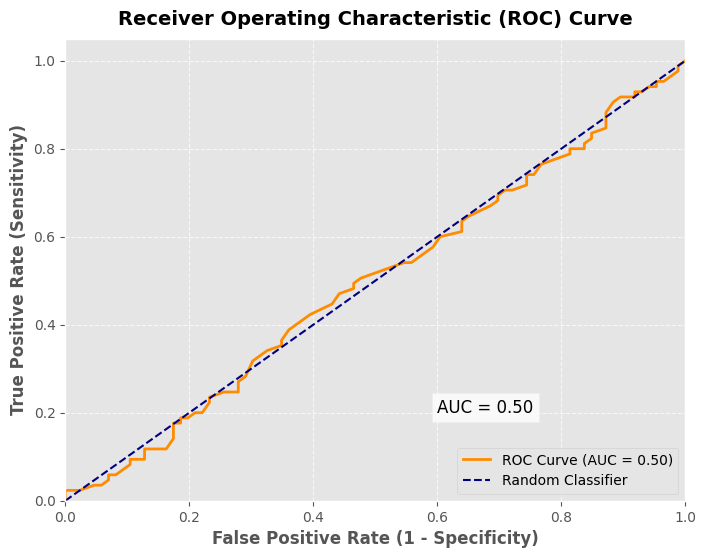

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import numpy as np

# Assuming model, X_test, and y_test are already defined
# Get predicted probabilities for the positive class (Class_Label = 1)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Create a high-quality plot
plt.figure(figsize=(8, 6), dpi=100)  # Set figure size and resolution
plt.style.use('ggplot')  # Use 'ggplot' style for clean aesthetics (alternative to seaborn)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', lw=1.5, label='Random Classifier')  # Diagonal line
plt.xlim([0.0, 1.0])  # Set x-axis limits
plt.ylim([0.0, 1.05])  # Set y-axis limits
plt.xlabel('False Positive Rate (1 - Specificity)', fontsize=12, weight='bold')
plt.ylabel('True Positive Rate (Sensitivity)', fontsize=12, weight='bold')
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=14, weight='bold', pad=10)
plt.grid(True, linestyle='--', alpha=0.7)  # Add grid for readability
plt.legend(loc='lower right', fontsize=10)  # Place legend in lower-right corner

# Optional: Annotate AUC on the plot
plt.text(0.6, 0.2, f'AUC = {roc_auc:.2f}', fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

# Save the plot as a high-resolution image
# plt.savefig('roc_curve.png', dpi=300, bbox_inches='tight')
plt.show()

# The overall report is generated like this :

**1. Precision**

👉 When the model predicts “healthy”, how often is it correct?

Example:

Model predicted 5 patients as healthy.
Only 3 of them are truly healthy.
Precision = 3 ÷ 5 = 0.6 (60%)

**2. Recall**

👉 Out of all actual healthy patients, how many did the model find?

Example:

There are 4 truly healthy patients.
Model correctly predicted 3 of them as healthy.
Recall = 3 ÷ 4 = 0.75 (75%)

**3. F1-score**

👉 Balances precision & recall into one score.

Example:

Precision = 0.6
Recall = 0.75
F1 ≈ 0.67

Think of it like: “Okay, my model is not perfect at being precise or complete, but overall, it balances both at 67%.”

**4. Support**

👉 How many samples belong to each class in the test set.

Example:

Healthy patients = 4
Non-healthy patients = 6
Support = {Healthy: 4, Non-healthy: 6}

**5. Accuracy**

👉 Out of all patients, how many were correctly classified?

Example:

Total patients = 10
Correct predictions = 7
Accuracy = 7 ÷ 10 = 0.7 (70%)

**6. Macro avg**

👉 Treats each class equally, no matter how many samples it has.

Example:

Suppose:

Precision for Healthy = 0.8
Precision for Non-Healthy = 0.4
Macro Precision = (0.8 + 0.4) ÷ 2 = 0.6

✅ Healthy & Non-Healthy are weighted the same (even if one has more patients).

**7. Weighted avg**

👉 Takes into account class sizes (support).

Example:

Suppose:

Precision for Healthy = 0.8 (support = 2 patients)
Precision for Non-Healthy = 0.4 (support = 8 patients)
Weighted Precision = (0.8×2 + 0.4×8) ÷ (2+8) = (1.6 + 3.2) ÷ 10 = 0.48

✅ Bigger classes have more influence on the score.

⚡**In one sentence each:**

Precision = Out of predicted positives → how many are really positive?

Recall = Out of actual positives → how many did we catch?

F1 = Balance between being precise and catching everything.

Support = How many test samples per class.

Accuracy = Total correct ÷ total samples.

Macro avg = Equal importance for each class.

Weighted avg = Bigger classes count more.

In [ ]:
from sklearn.metrics import classification_report
import pandas as pd

# Assuming model, X_test, and y_test are already defined
# Predict on the test set
y_pred = model.predict(X_test)

# Define class names for readability
class_names = {0: 'NON-HEALTHY', 1: 'HEALTHY'}

# Generate classification report with custom class names
report = classification_report(y_test, y_pred, target_names=class_names.values(), output_dict=True)

# Convert report to a DataFrame for better formatting
report_df = pd.DataFrame(report).transpose()

# Round numerical values for clarity
report_df = report_df.round(3)

# Print the classification report
print("Classification Report:")
print(report_df)

# Brief interpretation for students
print("\nInterpretation:")
print("- Precision: Proportion of predicted positives that are correct.")
print("- Recall: Proportion of actual positives correctly identified.")
print("- F1-Score: Harmonic mean of precision and recall.")
print("- Support: Number of samples for each class.")
print(f"- NON-HEALTHY (0): {int(report_df.loc['NON-HEALTHY', 'support'])} samples")
print(f"- HEALTHY (1): {int(report_df.loc['HEALTHY', 'support'])} samples")
print(f"- Accuracy: {report_df.loc['accuracy', 'precision']:.3f} (overall proportion of correct predictions)")

Classification Report:
              precision  recall  f1-score  support
NON-HEALTHY       0.515   0.605     0.556   86.000
HEALTHY           0.514   0.424     0.465   85.000
accuracy          0.515   0.515     0.515    0.515
macro avg         0.515   0.514     0.510  171.000
weighted avg      0.515   0.515     0.511  171.000

Interpretation:
- Precision: Proportion of predicted positives that are correct.
- Recall: Proportion of actual positives correctly identified.
- F1-Score: Harmonic mean of precision and recall.
- Support: Number of samples for each class.
- NON-HEALTHY (0): 86 samples
- HEALTHY (1): 85 samples
- Accuracy: 0.515 (overall proportion of correct predictions)


# Confusion Matrix
✅ Why is it useful?

More information than accuracy

Accuracy might say "90% correct", but the confusion matrix shows where the model is making mistakes.<br>
Example: maybe it predicts Healthy well, but struggles with Non-Healthy.

**Foundation for metrics**

From the confusion matrix, we calculate:

* Precision = TP ÷ (TP + FP)
* Recall = TP ÷ (TP + FN)
* F1-score = balance between precision & recall
* And more (specificity, sensitivity, etc.)

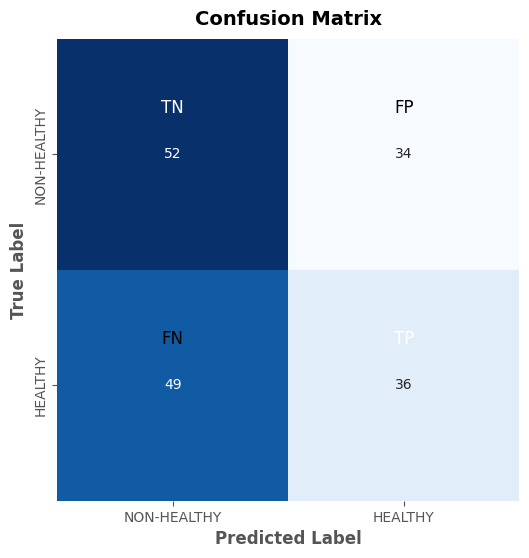

Class_Label
0    86
1    85
Name: count, dtype: int64
Confusion Matrix Interpretation:
- True Negatives (TN): 52 (Correctly predicted NON-HEALTHY)
- False Positives (FP): 34 (NON-HEALTHY predicted as HEALTHY)
- False Negatives (FN): 49 (HEALTHY predicted as NON-HEALTHY)
- True Positives (TP): 36 (Correctly predicted HEALTHY)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# Assuming model, X_test, and y_test are already defined
# Predict on the test set
y_pred = model.predict(X_test)

# Define class names for readability
class_names = ['NON-HEALTHY', 'HEALTHY']

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a high-quality plot
plt.figure(figsize=(6, 6), dpi=100)  # Set figure size and resolution
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names,
            cbar=False, square=True)
plt.xlabel('Predicted Label', fontsize=12, weight='bold')
plt.ylabel('True Label', fontsize=12, weight='bold')
plt.title('Confusion Matrix', fontsize=14, weight='bold', pad=10)

# Annotate TP, TN, FP, FN for clarity
plt.text(0.5, 0.3, 'TN', horizontalalignment='center', verticalalignment='center', fontsize=12, color='white')
plt.text(1.5, 0.3, 'FP', horizontalalignment='center', verticalalignment='center', fontsize=12, color='black')
plt.text(0.5, 1.3, 'FN', horizontalalignment='center', verticalalignment='center', fontsize=12, color='black')
plt.text(1.5, 1.3, 'TP', horizontalalignment='center', verticalalignment='center', fontsize=12, color='white')

# Save the plot as a high-resolution image
plt.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()
print(y_test.value_counts())
# Print interpretation for students
print("Confusion Matrix Interpretation:")
print(f"- True Negatives (TN): {cm[0, 0]} (Correctly predicted NON-HEALTHY)")
print(f"- False Positives (FP): {cm[0, 1]} (NON-HEALTHY predicted as HEALTHY)")
print(f"- False Negatives (FN): {cm[1, 0]} (HEALTHY predicted as NON-HEALTHY)")
print(f"- True Positives (TP): {cm[1, 1]} (Correctly predicted HEALTHY)")

# 2] Support Vector Machine (SVM) Classifier with RBF Kernel


---
The class SVC (Support Vector Classifier) comes from scikit-learn.

✅ Summary

* SVM tries to separate classes by finding the best possible boundary.
* The RBF kernel allows for non-linear decision boundaries.
* The chosen C=0.1 makes the model tolerant of some errors (to avoid overfitting).
* With probability=True, we will be able to use the model’s outputs in things like ROC curves and probability-based evaluation.

#### Libraries we imported

* pandas, numpy → data handling.
* matplotlib, seaborn → visualization.
* train_test_split → split dataset into training & testing sets.
* StandardScaler → normalize features (important for SVMs).
* SVC (Support Vector Classifier) → our machine learning model.
* metrics (accuracy, classification_report, confusion_matrix, roc_curve, auc) → to evaluate the model.

### Parameters

**kernel='rbf'**
* RBF = Radial Basis Function kernel.
* This allows the SVM to classify data that is not linearly separable by mapping it into higher dimensions.
* In short: it can draw more complex, curved decision boundaries.

**C=0.1**
* This is the regularization parameter.
* Smaller C (like 0.1) → model is softer, allows more misclassifications but generalizes better.
* Larger C (like 10, 100) → tries to classify training data perfectly (risk of overfitting).

**probability=True**
* By default, SVM only gives class predictions.
* With this, it also estimates probability scores (needed for ROC curve / AUC).

**random_state=42**
* Fixes randomness so results are reproducible.

### What does fit(X_train, y_train) do?

This trains the SVM model:
* Finds the best hyperplane (or curve in higher dimensions) that separates our  classes (e.g., Healthy vs Non-Healthy).
* Maximizes the margin (distance between data points and the separating boundary).



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc


# --- Section 1: Training ---
print("=== Section 1: Training ===")

# Initialize and train the SVM model
svm_model = SVC(kernel='rbf', C=0.1, probability=True, random_state=42)
svm_model.fit(X_train, y_train)

=== Section 1: Training ===


SVC(C=0.1, probability=True, random_state=42)

This section is about evaluating accuracy.
* Uses the trained SVM model to predict outcomes on unseen test data.

* Calculates accuracy (how many predictions were correct).

* Optionally can calculate F1-score for a deeper performance check.

In [ ]:
# --- Section 2: Accuracy ---
print("\n=== Section 2: Accuracy ===")
# Predict on the test set
y_pred = svm_model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
# print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")


=== Section 2: Accuracy ===
Accuracy: 0.5146


# please check


=== Section 3: ROC Curve ===


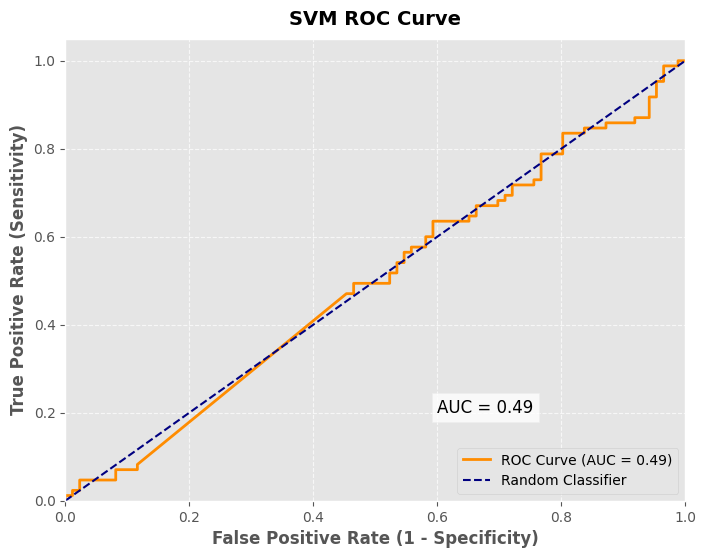

In [ ]:
# --- Section 3: ROC Curve ---
print("\n=== Section 3: ROC Curve ===")
# Get predicted probabilities for the positive class (HEALTHY)
y_pred_proba = svm_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Create ROC plot
plt.figure(figsize=(8, 6), dpi=100)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', lw=1.5, label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)', fontsize=12, weight='bold')
plt.ylabel('True Positive Rate (Sensitivity)', fontsize=12, weight='bold')
plt.title('SVM ROC Curve', fontsize=14, weight='bold', pad=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(loc='lower right', fontsize=10)
plt.text(0.6, 0.2, f'AUC = {roc_auc:.2f}', fontsize=12, bbox=dict(facecolor='white', alpha=0.8))
# plt.savefig('svm_roc_curve.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# --- Section 4: Classification Report ---
print("\n=== Section 4: Classification Report ===")
# Generate classification report
report = classification_report(y_test, y_pred, target_names=class_names, output_dict=True)
report_df = pd.DataFrame(report).transpose().round(3)
print("Classification Report:")
print(report_df)
print("\nInterpretation:")
print("- Precision: Proportion of predicted positives that are correct.")
print("- Recall: Proportion of actual positives correctly identified.")
print("- F1-Score: Harmonic mean of precision and recall.")
print("- Support: Number of samples for each class.")
print(f"- NON-HEALTHY (0): {int(report_df.loc['NON-HEALTHY', 'support'])} samples")
print(f"- HEALTHY (1): {int(report_df.loc['HEALTHY', 'support'])} samples")
print(f"- Accuracy: {report_df.loc['accuracy', 'precision']:.3f}")


=== Section 4: Classification Report ===
Classification Report:
              precision  recall  f1-score  support
NON-HEALTHY       0.588   0.116     0.194   86.000
HEALTHY           0.506   0.918     0.653   85.000
accuracy          0.515   0.515     0.515    0.515
macro avg         0.547   0.517     0.423  171.000
weighted avg      0.548   0.515     0.422  171.000

Interpretation:
- Precision: Proportion of predicted positives that are correct.
- Recall: Proportion of actual positives correctly identified.
- F1-Score: Harmonic mean of precision and recall.
- Support: Number of samples for each class.
- NON-HEALTHY (0): 86 samples
- HEALTHY (1): 85 samples
- Accuracy: 0.515



=== Section 5: Confusion Matrix ===


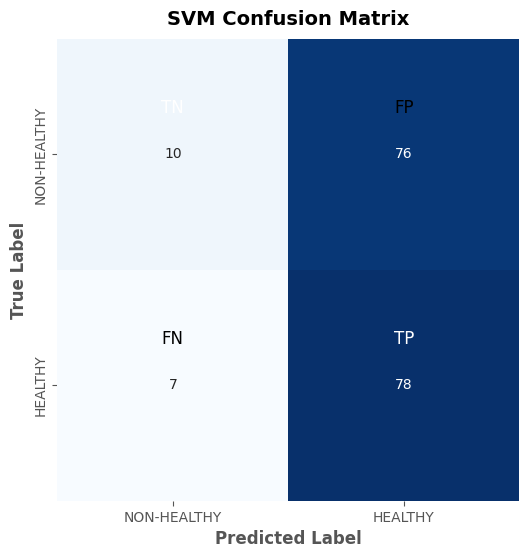

Class_Label
0    86
1    85
Name: count, dtype: int64
Confusion Matrix Interpretation:
- True Negatives (TN): 10 (Correctly predicted NON-HEALTHY)
- False Positives (FP): 76 (NON-HEALTHY predicted as HEALTHY)
- False Negatives (FN): 7 (HEALTHY predicted as NON-HEALTHY)
- True Positives (TP): 78 (Correctly predicted HEALTHY)


In [ ]:
# --- Section 5: Confusion Matrix ---
print("\n=== Section 5: Confusion Matrix ===")
# Assuming X (features, taxa columns) and y (Class_Label) are defined
# Define class names for readability
class_names = ['NON-HEALTHY', 'HEALTHY']

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix

plt.figure(figsize=(6, 6), dpi=100)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names,
            cbar=False, square=True)
plt.text(0.5, 0.3, 'TN', horizontalalignment='center', verticalalignment='center', fontsize=12, color='white')
plt.text(1.5, 0.3, 'FP', horizontalalignment='center', verticalalignment='center', fontsize=12, color='black')
plt.text(0.5, 1.3, 'FN', horizontalalignment='center', verticalalignment='center', fontsize=12, color='black')
plt.text(1.5, 1.3, 'TP', horizontalalignment='center', verticalalignment='center', fontsize=12, color='white')
plt.xlabel('Predicted Label', fontsize=12, weight='bold')
plt.ylabel('True Label', fontsize=12, weight='bold')
plt.title('SVM Confusion Matrix', fontsize=14, weight='bold', pad=10)
plt.savefig('svm_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()
print(y_test.value_counts())
# Print confusion matrix interpretation
print("Confusion Matrix Interpretation:")
print(f"- True Negatives (TN): {cm[0, 0]} (Correctly predicted NON-HEALTHY)")
print(f"- False Positives (FP): {cm[0, 1]} (NON-HEALTHY predicted as HEALTHY)")
print(f"- False Negatives (FN): {cm[1, 0]} (HEALTHY predicted as NON-HEALTHY)")
print(f"- True Positives (TP): {cm[1, 1]} (Correctly predicted HEALTHY)")

# For Feature selection

In [ ]:
import pandas as pd
otu_df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/OTU_Table_CRC_851.tsv',sep="\t", index_col=0)
otu_df

,SRR32732804,SRR32732805,SRR32732806,SRR32732807,SRR32732808,SRR32732809,SRR32732810,SRR32732811,SRR32732813,SRR32732814,...,SRR32733691,SRR32733692,SRR32733693,SRR32733694,SRR32733695,SRR32733696,SRR32733697,SRR32733698,SRR32733699,SRR32733700
Bacteroides xylanisolvens,3232092,383411,63773,204219,1464145,106125,274709,232809,1179323,1384180,...,515110,483829,192112,5141498,885775,135885,61316,71793,93594,195599
Bacteroides finegoldii,851026,34049,17527,51546,102643,8398,63793,45654,137449,1531351,...,93588,47202,279165,158712,335456,23166,16353,262154,215860,29743
Bacteroides ovatus,631604,195250,53197,4002970,1331243,101814,622567,800555,2510966,615396,...,1273619,625157,260231,1051579,323376,353907,5248,245473,28510,409488
Bacteroides sp902362375,499300,117253,14670,85542,234381,15628,98329,120593,384453,385922,...,184016,100142,43224,263730,103097,54273,4176,37103,8360,67425
Bacteroides nordii,123744,27246,8643,170255,31901,3207,37458,3211,56297,17552,...,102020,6228,59793,13324,14348,87856,2923,37388,14192,27676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Campylobacter_D coli_B,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Helicobacter pylori_BU,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Methanobacterium sp000499765,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Campylobacter fetus,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Because of low performance of our model, we apply filter, and keep only those species which are present in atleast 20% and more

In [ ]:
import pandas as pd
import numpy as np


# Step 1: Prevalence Filter (species present in at least 20% of samples)
min_samples = int(0.2 * otu_df.shape[1])  # 20% of 851 = 171 samples
non_zero_counts = (otu_df > 0).sum(axis=1)  # Count non-zero samples per species
prevalence_filtered_df = otu_df[non_zero_counts >= min_samples]
prevalence_filtered_df

,SRR32732804,SRR32732805,SRR32732806,SRR32732807,SRR32732808,SRR32732809,SRR32732810,SRR32732811,SRR32732813,SRR32732814,...,SRR32733691,SRR32733692,SRR32733693,SRR32733694,SRR32733695,SRR32733696,SRR32733697,SRR32733698,SRR32733699,SRR32733700
Bacteroides xylanisolvens,3232092,383411,63773,204219,1464145,106125,274709,232809,1179323,1384180,...,515110,483829,192112,5141498,885775,135885,61316,71793,93594,195599
Bacteroides finegoldii,851026,34049,17527,51546,102643,8398,63793,45654,137449,1531351,...,93588,47202,279165,158712,335456,23166,16353,262154,215860,29743
Bacteroides ovatus,631604,195250,53197,4002970,1331243,101814,622567,800555,2510966,615396,...,1273619,625157,260231,1051579,323376,353907,5248,245473,28510,409488
Bacteroides sp902362375,499300,117253,14670,85542,234381,15628,98329,120593,384453,385922,...,184016,100142,43224,263730,103097,54273,4176,37103,8360,67425
Bacteroides nordii,123744,27246,8643,170255,31901,3207,37458,3211,56297,17552,...,102020,6228,59793,13324,14348,87856,2923,37388,14192,27676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Enterococcus_C dispar,0,0,0,0,0,0,0,0,0,0,...,21,0,13,0,0,0,0,0,0,0
MGYG000000342,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,23,0,14,0,0
HGM20899 sp900767005,0,0,0,0,0,0,0,0,0,0,...,0,0,12,11,23,0,0,22,0,14
Enterovibrio hollisae,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,14


1. Convert raw counts → relative abundance

👉 This normalizes each column so values become fractions (relative abundance) instead of raw counts.

Example:
* Sample total = 10,000 reads
* Species A count = 100
* Relative abundance = 100 ÷ 10,000 = 0.01 (1%)

2. Compute mean relative abundance per species

👉 This tells you how common a species is on average in the dataset.

Example:
* Species A relative abundance across 3 samples = [0.01, 0.005, 0.02]
* Mean = (0.01 + 0.005 + 0.02) / 3 = 0.0117 (≈1.2%)

In [ ]:
# Step 2: Abundance Filter (mean relative abundance >= 0.0001)
# Calculate relative abundance (normalize by sample total)
relative_abundance = prevalence_filtered_df.div(prevalence_filtered_df.sum(axis=0), axis=1)
# Compute mean relative abundance across samples for each species
mean_relative_abundance = relative_abundance.mean(axis=1)
mean_relative_abundance

,0
Bacteroides xylanisolvens,1.156226e-02
Bacteroides finegoldii,3.121691e-03
Bacteroides ovatus,1.523447e-02
Bacteroides sp902362375,3.648941e-03
Bacteroides nordii,1.211639e-03
...,...
Enterococcus_C dispar,1.906479e-07
MGYG000000342,2.354672e-06
HGM20899 sp900767005,2.096659e-07
Enterovibrio hollisae,1.359112e-07


we set a cutoff: keep only species with a mean relative abundance ≥ 0.0001 (0.01%).

Any species with lower average abundance is considered too rare/noisy and will be removed.

In [ ]:

# Filter species with mean relative abundance >= 0.0001
abundance_threshold =0.0001
filtered_otu_df = prevalence_filtered_df[mean_relative_abundance >= abundance_threshold]
filtered_otu_df

,SRR32732804,SRR32732805,SRR32732806,SRR32732807,SRR32732808,SRR32732809,SRR32732810,SRR32732811,SRR32732813,SRR32732814,...,SRR32733691,SRR32733692,SRR32733693,SRR32733694,SRR32733695,SRR32733696,SRR32733697,SRR32733698,SRR32733699,SRR32733700
Bacteroides xylanisolvens,3232092,383411,63773,204219,1464145,106125,274709,232809,1179323,1384180,...,515110,483829,192112,5141498,885775,135885,61316,71793,93594,195599
Bacteroides finegoldii,851026,34049,17527,51546,102643,8398,63793,45654,137449,1531351,...,93588,47202,279165,158712,335456,23166,16353,262154,215860,29743
Bacteroides ovatus,631604,195250,53197,4002970,1331243,101814,622567,800555,2510966,615396,...,1273619,625157,260231,1051579,323376,353907,5248,245473,28510,409488
Bacteroides sp902362375,499300,117253,14670,85542,234381,15628,98329,120593,384453,385922,...,184016,100142,43224,263730,103097,54273,4176,37103,8360,67425
Bacteroides nordii,123744,27246,8643,170255,31901,3207,37458,3211,56297,17552,...,102020,6228,59793,13324,14348,87856,2923,37388,14192,27676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Megasphaera sp001546855,0,0,0,0,12,26,25,46,0,27,...,41,0,36,28,34,0,28,44,145045,17
QAMH01 sp900544245,0,0,0,0,11,253895,14,28,0,14,...,0,0,14,70,49,134,36,1569,172,31
Zag1 sp001917115,0,0,0,0,48,23,20,0,118,46,...,17,0,16,42,103,0,46,17,12,0
CAG-1427 sp000436075,0,0,0,0,0,17562,22250,0,0,0,...,0,0,20,25,13,0,25,25624,3895,0


In [ ]:
import pandas as pd
import numpy as np

# Step 3: Add pseudocount of 1 to handle zeros
otu_df_pseudo = filtered_otu_df + 1

# Step 4: CLR transformation function
def clr_transform(df):
    # Compute geometric mean for each sample (column)
    gm = np.exp(np.log(df).mean(axis=0))
    # Apply CLR: log(x_i / GM)
    clr_df = np.log(df / gm)
    return clr_df

# Apply CLR transformation
otu_df_clr = clr_transform(otu_df_pseudo)

# Display the resulting CLR-transformed DataFrame
print(otu_df_clr)

# Optional: Save to file
# otu_df_clr.to_csv('OTU_Table_CRC_851_clr_filtered.tsv', sep='\t')

                           SRR32732804  SRR32732805  SRR32732806  SRR32732807  \
Bacteroides xylanisolvens     7.723729     5.037595     3.799790     5.470439   
Bacteroides finegoldii        6.389287     2.616315     2.508244     4.093735   
Bacteroides ovatus            6.091108     4.362771     3.618465     8.446033   
Bacteroides sp902362375       5.856053     3.852827     2.330317     4.600260   
Bacteroides nordii            4.461067     2.393428     1.801310     5.288544   
...                                ...          ...          ...          ...   
Megasphaera sp001546855      -7.264912    -7.819270    -7.263311    -6.756514   
QAMH01 sp900544245           -7.264912    -7.819270    -7.263311    -6.756514   
Zag1 sp001917115             -7.264912    -7.819270    -7.263311    -6.756514   
CAG-1427 sp000436075         -7.264912    -7.819270    -7.263311    -6.756514   
CAG-306 sp000980375          -7.264912    -7.819270    -7.263311    -6.756514   

                           

In [ ]:
df_clr=otu_df_clr.T
df_clr

,Bacteroides xylanisolvens,Bacteroides finegoldii,Bacteroides ovatus,Bacteroides sp902362375,Bacteroides nordii,Bacteroides thetaiotaomicron,Bacteroides acidifaciens,Bacteroides fragilis_A,Bacteroides sp900765785,Bacteroides faecis,...,CAG-521 sp000437635,Turicimonas muris,UMGS1688 sp900544575,Victivallis sp002998355,UBA11452 sp003526375,Megasphaera sp001546855,QAMH01 sp900544245,Zag1 sp001917115,CAG-1427 sp000436075,CAG-306 sp000980375
SRR32732804,7.723729,6.389287,6.091108,5.856053,4.461067,4.487747,4.297451,4.047610,4.035748,3.946138,...,-7.264912,-7.264912,-7.264912,-7.264912,-7.264912,-7.264912,-7.264912,-7.264912,-7.264912,-7.264912
SRR32732805,5.037595,2.616315,4.362771,3.852827,2.393428,4.024030,3.279366,1.486653,2.833461,1.793999,...,-7.819270,-7.819270,-7.819270,-7.819270,-7.819270,-7.819270,-7.819270,-7.819270,-7.819270,-7.819270
SRR32732806,3.799790,2.508244,3.618465,2.330317,1.801310,8.734631,4.657769,0.571477,5.841768,6.016082,...,-2.832494,-4.172268,-7.263311,-7.263311,-7.263311,-7.263311,-7.263311,-7.263311,-7.263311,-7.263311
SRR32732807,5.470439,4.093735,8.446033,4.600260,5.288544,3.786430,5.101617,3.815521,5.514508,3.376934,...,-4.358619,-6.756514,-3.389218,-6.756514,-6.756514,-6.756514,-6.756514,-6.756514,-6.756514,-6.756514
SRR32732808,6.359884,3.702124,6.264726,4.527809,2.533526,2.045366,4.014433,0.868930,3.323942,1.632879,...,-7.836898,-7.836898,-3.759361,-4.541061,-4.745856,-5.271949,-5.351992,-3.945078,-7.836898,-7.836898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRR32733696,3.896858,2.127770,4.854078,2.979087,3.460752,6.214714,1.926634,5.647392,3.743654,3.799321,...,1.567075,-7.922714,-7.922714,1.274845,-5.437807,-7.922714,-3.017439,-7.922714,-7.922714,-7.922714
SRR32733697,3.415736,2.094151,0.957717,0.729272,0.372631,6.889983,2.514105,0.025293,3.598473,3.484001,...,-7.608076,-7.608076,-3.637784,-4.835488,-7.608076,-4.240781,-3.997158,-3.757929,-4.349980,-4.563554
SRR32733698,2.793286,4.088421,4.022676,2.133210,2.140862,2.999002,1.339435,0.532921,1.376530,1.674441,...,-8.388270,-5.443831,-4.168762,0.960092,2.548367,-4.581607,-1.029439,-5.497898,1.763054,-2.046148
SRR32733699,3.776627,4.612285,2.587940,1.361228,1.890399,5.093710,2.807183,0.165079,3.160277,2.685700,...,-7.670105,-7.670105,-7.670105,2.227515,-4.836892,4.214701,-2.516813,-5.105156,0.597601,-7.670105


In [ ]:
metadata['Class_Label'] = metadata['Health_status'].apply(lambda x: 1 if x == 'HEALTHY' else 0)
print(metadata.head())

           Run  Age     Sex    BMI Phenotype Health_status  Class_Label
0  SRR32732804   64  female  25.33   Adenoma   NON-HEALTHY            0
1  SRR32732805   72  female  24.85   Adenoma   NON-HEALTHY            0
2  SRR32732806   71  female  31.79   Adenoma   NON-HEALTHY            0
3  SRR32732807   71  female  21.92   Control       HEALTHY            1
4  SRR32732808   59  female  29.53   Adenoma   NON-HEALTHY            0


In [ ]:
merged_df = pd.merge(df_clr, metadata, left_index=True, right_on="Run")
merged_df

,Bacteroides xylanisolvens,Bacteroides finegoldii,Bacteroides ovatus,Bacteroides sp902362375,Bacteroides nordii,Bacteroides thetaiotaomicron,Bacteroides acidifaciens,Bacteroides fragilis_A,Bacteroides sp900765785,Bacteroides faecis,...,Zag1 sp001917115,CAG-1427 sp000436075,CAG-306 sp000980375,Run,Age,Sex,BMI,Phenotype,Health_status,Class_Label
0,7.723729,6.389287,6.091108,5.856053,4.461067,4.487747,4.297451,4.047610,4.035748,3.946138,...,-7.264912,-7.264912,-7.264912,SRR32732804,64,female,25.33,Adenoma,NON-HEALTHY,0
1,5.037595,2.616315,4.362771,3.852827,2.393428,4.024030,3.279366,1.486653,2.833461,1.793999,...,-7.819270,-7.819270,-7.819270,SRR32732805,72,female,24.85,Adenoma,NON-HEALTHY,0
2,3.799790,2.508244,3.618465,2.330317,1.801310,8.734631,4.657769,0.571477,5.841768,6.016082,...,-7.263311,-7.263311,-7.263311,SRR32732806,71,female,31.79,Adenoma,NON-HEALTHY,0
3,5.470439,4.093735,8.446033,4.600260,5.288544,3.786430,5.101617,3.815521,5.514508,3.376934,...,-6.756514,-6.756514,-6.756514,SRR32732807,71,female,21.92,Control,HEALTHY,1
4,6.359884,3.702124,6.264726,4.527809,2.533526,2.045366,4.014433,0.868930,3.323942,1.632879,...,-3.945078,-7.836898,-7.836898,SRR32732808,59,female,29.53,Adenoma,NON-HEALTHY,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
892,3.896858,2.127770,4.854078,2.979087,3.460752,6.214714,1.926634,5.647392,3.743654,3.799321,...,-7.922714,-7.922714,-7.922714,SRR32733696,57,female,21.28,Adenoma,NON-HEALTHY,0
893,3.415736,2.094151,0.957717,0.729272,0.372631,6.889983,2.514105,0.025293,3.598473,3.484001,...,-3.757929,-4.349980,-4.563554,SRR32733697,66,female,23.29,Adenoma,NON-HEALTHY,0
894,2.793286,4.088421,4.022676,2.133210,2.140862,2.999002,1.339435,0.532921,1.376530,1.674441,...,-5.497898,1.763054,-2.046148,SRR32733698,63,female,19.76,Control,HEALTHY,1
895,3.776627,4.612285,2.587940,1.361228,1.890399,5.093710,2.807183,0.165079,3.160277,2.685700,...,-5.105156,0.597601,-7.670105,SRR32733699,71,female,29.12,Adenoma,NON-HEALTHY,0


In [ ]:
# Drop metadata columns, keeping Run_ID and taxa columns
metadata_columns = ['Sex', 'BMI', 'Phenotype','Age', 'Health_status','Run', 'Class_Label']
X = merged_df.drop(columns=metadata_columns)

# Extract the target variable (Class_Label)
y = merged_df['Class_Label']

# After feature selection based on prevalence and mean abundance filtering we again try to buid model to see whether it has shown any improvemwnt

In [ ]:
from sklearn.model_selection import train_test_split

# Step 1: Split the data into training and test sets
# Using 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Random Forest with 200 decision trees


---

Here we quickly validated the models performance based on Accuracy and Classification Report

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


# Step 2: Initialize and train the Random Forest classifier

# Initialize and train the Random Forest classifier with optimized parameters
rf_classifier = RandomForestClassifier(
    n_estimators=200,           # More trees for robustness
    max_depth=15,              # Limit depth to prevent overfitting
    min_samples_split=5,       # Minimum samples to split a node
    min_samples_leaf=2,        # Minimum samples in a leaf
    max_features='sqrt',       # Consider sqrt(896) ~ 30 features per split
    random_state=42,           # Reproducibility
    n_jobs=-1                 # Use all CPU cores
)

# Train the model
rf_classifier.fit(X_train, y_train)
# Step 3: Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Step 4: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Set Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Test Set Accuracy: 0.5439

Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.56      0.55        85
           1       0.55      0.52      0.54        86

    accuracy                           0.54       171
   macro avg       0.54      0.54      0.54       171
weighted avg       0.54      0.54      0.54       171



# Random Forest with 200 decision trees (With extra parameters)

---
👉 What it does:

Defines the same Random Forest model (with class_weight='balanced' to handle class imbalance).

Uses learning_curve() with cross-validation (cv=5).

Trains the model on different fractions of the training set (10% → 100%).

Plots training accuracy vs. validation accuracy as training data size increases.


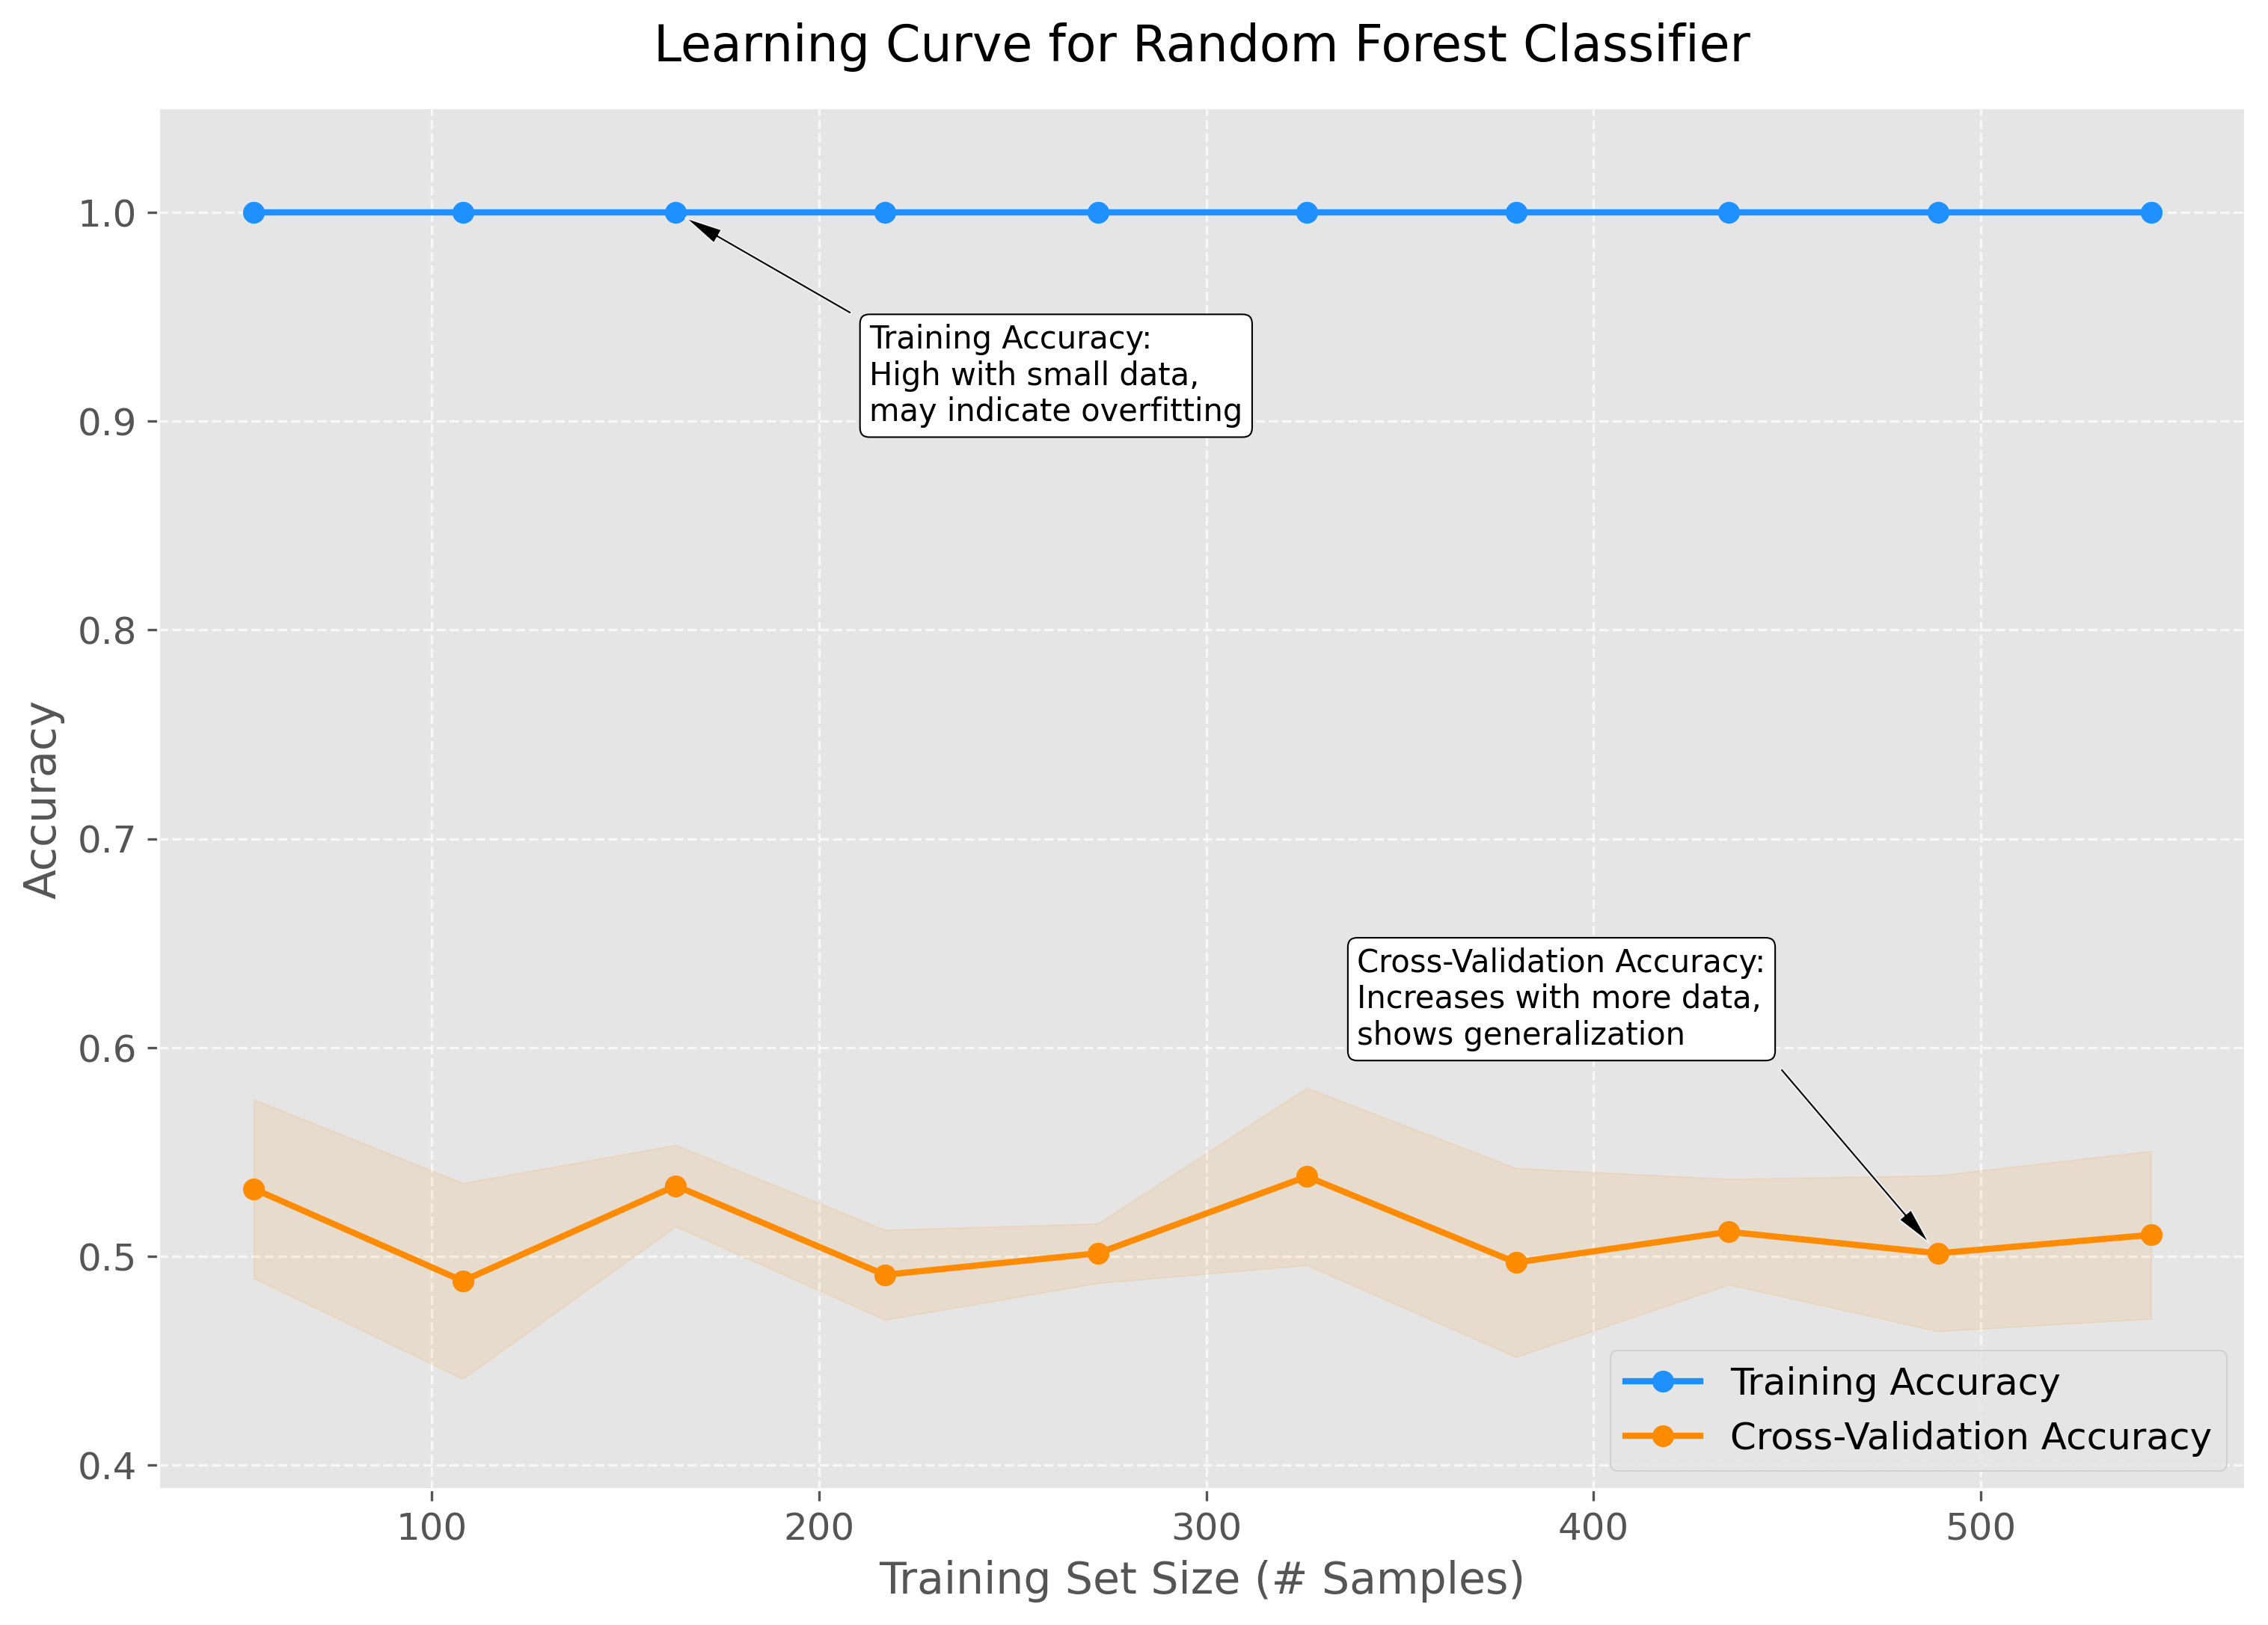

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Define Random Forest with the provided optimized parameters
rf_classifier = RandomForestClassifier(
    n_estimators=200,           # More trees for robustness
    max_depth=15,              # Limit depth to prevent overfitting
    min_samples_split=5,       # Minimum samples to split a node
    min_samples_leaf=2,        # Minimum samples in a leaf
    max_features='sqrt',       # Consider sqrt(896) ~ 30 features per split
    class_weight='balanced',   # Handle potential class imbalance
    random_state=42,           # Reproducibility
    n_jobs=-1                  # Use all CPU cores
)

# Step 2: Generate learning curve data
# Define training sizes (10% to 100% of training data, ~68 to 680 samples)
train_sizes = np.linspace(0.1, 1.0, 10)

# Compute learning curve scores
train_sizes, train_scores, val_scores = learning_curve(
    rf_classifier,
    X_train,
    y_train,
    train_sizes=train_sizes,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42)

# Calculate mean and standard deviation
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Step 3: Create high-quality learning curve plot
plt.figure(figsize=(12, 8), dpi=300)  # High-resolution figure
plt.plot(train_sizes, train_scores_mean, 'o-', color='dodgerblue', label='Training Accuracy', linewidth=2)
plt.plot(train_sizes, val_scores_mean, 'o-', color='darkorange', label='Cross-Validation Accuracy', linewidth=2)

# Add shaded regions for standard deviation
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color='dodgerblue')
plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
                 val_scores_mean + val_scores_std, alpha=0.1, color='darkorange')

# Customize plot for clarity and professionalism
plt.xlabel('Training Set Size (# Samples)', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Learning Curve for Random Forest Classifier', fontsize=16, pad=15)
plt.legend(loc='best', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add annotations for student explanation
plt.annotate('Training Accuracy:\nHigh with small data,\nmay indicate overfitting',
            xy=(train_sizes[2], train_scores_mean[2]),
            xytext=(train_sizes[2] + 50, train_scores_mean[2] - 0.1),
            arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=5),
            fontsize=10, bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white"))

plt.annotate('Cross-Validation Accuracy:\nIncreases with more data,\nshows generalization',
            xy=(train_sizes[-2], val_scores_mean[-2]),
            xytext=(train_sizes[-2] - 150, val_scores_mean[-2] + 0.1),
            arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=5),
            fontsize=10, bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white"))

# Set y-axis limits for clarity
plt.ylim(min(min(train_scores_mean), min(val_scores_mean)) - 0.1, 1.05)

# Save plot as high-quality image
plt.savefig('rf_learning_curve_high_quality.png', dpi=300, bbox_inches='tight')
plt.show()

This code tells us which features matter most for the Random Forest’s decisions, ranking them from most to least important.

In [ ]:
# Optional: Feature importance
# Ensure the classifier is fitted before accessing feature_importances_
rf_classifier.fit(X_train, y_train)

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_classifier.feature_importances_
}).sort_values(by='Importance', ascending=False)
print(feature_importance)

                         Feature  Importance
791        Collinsella stercoris    0.003592
527          UBA9502 sp900538475    0.003067
159          CAG-279 sp000437795    0.003003
528          UBA9502 sp900540335    0.002862
810     Collinsella intestinalis    0.002829
..                           ...         ...
24       Bacteroides sp002491635    0.000370
456  Mediterraneibacter lactaris    0.000332
34            Bacteroides fluxus    0.000314
677           SFFH01 sp900542445    0.000301
787              RC9 sp000434935    0.000288

[826 rows x 2 columns]


In [ ]:
feat=feature_importance[feature_importance["Importance"]>0]
len(feat)

826

# Random Forest with 200 decision trees (Based on Imp Features)

---
This code takes only the useful features (importance > 0), retrains the Random Forest with them, and checks if the model performs better, worse, or the same compared to using all features.

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Step 2: Filter features with importance > 0
important_features = feature_importance[feature_importance['Importance'] > 0]['Feature'].tolist()
print(f"\nNumber of features with importance > 0: {len(important_features)}")

# Step 3: Subset X_train and X_test to include only important features
X_train_filtered = X_train[important_features]
X_test_filtered = X_test[important_features]

# Step 4: Retrain Random Forest with optimized parameters on filtered features
rf_classifier_filtered = RandomForestClassifier(
    n_estimators=200,           # More trees for robustness
    max_depth=15,              # Limit depth to prevent overfitting
    min_samples_split=5,       # Minimum samples to split a node
    min_samples_leaf=2,        # Minimum samples in a leaf
    max_features='sqrt',       # Consider sqrt(number of important features) per split
    class_weight='balanced',   # Handle potential class imbalance
    random_state=42,           # Reproducibility
    n_jobs=-1                  # Use all CPU cores
)

# Train the model on filtered features
rf_classifier_filtered.fit(X_train_filtered, y_train)

# Step 5: Predict on the test set
y_pred_filtered = rf_classifier_filtered.predict(X_test_filtered)

# Step 6: Evaluate the model
accuracy = accuracy_score(y_test, y_pred_filtered)
print(f"\nTest Set Accuracy (Filtered Features): {accuracy:.4f}")
print("\nClassification Report (Filtered Features):")
print(classification_report(y_test, y_pred_filtered))



Number of features with importance > 0: 826

Test Set Accuracy (Filtered Features): 0.5263

Classification Report (Filtered Features):
              precision    recall  f1-score   support

           0       0.52      0.53      0.53        85
           1       0.53      0.52      0.53        86

    accuracy                           0.53       171
   macro avg       0.53      0.53      0.53       171
weighted avg       0.53      0.53      0.53       171



# Logistic Regression with an L1 penalty (Lasso) as a feature selection tool.

---
Logistic Regression is only used as a filtering step, not as our final model.


✅ **In simple words:**
We are using **Lasso regression with cross-validation** to automatically **select the most important features** from our dataset. This step reduces dimensionality, avoids overfitting, and highlights which features are biologically or clinically relevant for predicting the outcome.

---

### 🔹 Step 1: **Lasso Feature Selection**

* We use **Logistic Regression with an L1 penalty (Lasso)**.
* Lasso has a special property: it can shrink some feature coefficients all the way down to **zero**.
* Features with non-zero coefficients are considered **important**; the others are dropped.

👉 **Why?**

* Many biological or clinical datasets (like OTU tables, gene expression, etc.) have **hundreds or thousands of features**, but not all of them matter.
* Lasso helps automatically **filter out irrelevant features**, keeping only the most informative ones.
* This reduces noise and prevents overfitting.

---

### 🔹 Step 2: **Hyperparameter tuning with GridSearchCV**

* Lasso has a parameter **C** (inverse of regularization strength).
* Small C → stronger penalty → fewer features kept.
* Large C → weaker penalty → more features kept.
* GridSearchCV tests multiple values of C and finds the one that gives the **best accuracy via cross-validation**.

👉 **Why?**

* We don’t know beforehand how strict the feature selection should be.
* Cross-validation ensures we choose a **balanced C** that generalizes well.

---

### 🔹 Step 3: **Select Features**

* Once the best model is found, we keep only features with **non-zero coefficients**.
* These are considered the **predictive features** selected by Lasso.

---

### 🔹 Step 4: **Transform Training & Test Data**

* We apply the same feature selection to both training and test sets.
* This ensures the model only “sees” the selected features in both cases.
---

### 🔹 Step 5: **Output**

* Prints out the number of selected features.
* Lists which features were chosen.






In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, classification_report


# Step 1: Lasso Feature Selection with Cross-Validation
# Define LogisticRegression with L1 penalty
lasso = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000, random_state=42)

# Define parameter grid for C (inverse of regularization strength)
param_grid = {'C': np.logspace(-4, 2, 10)}  # Range from 0.0001 to 100

# Perform GridSearchCV to find the best C
lasso_cv = GridSearchCV(lasso, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
lasso_cv.fit(X_train, y_train)

# Get the best Lasso model
best_lasso = lasso_cv.best_estimator_
print(f"Best Lasso C: {lasso_cv.best_params_['C']}")

# Select features with non-zero coefficients
selector = SelectFromModel(best_lasso, prefit=True)
X_train_lasso = selector.transform(X_train)
X_test_lasso = selector.transform(X_test)

# Get the selected feature names
selected_features = X_train.columns[selector.get_support()].tolist()
print(f"Number of selected features: {len(selected_features)}")
print(f"Selected features: {selected_features}")


Best Lasso C: 0.046415888336127774
Number of selected features: 102
Selected features: ['Bacteroides fragilis', 'Bacteroides intestinalis', 'Phocaeicola mediterraneensis', 'Prevotella sp003447235', 'Prevotellamassilia sp900772575', 'Prevotellamassilia timonensis', 'CAG-617 sp000431275', 'Parabacteroides sp900760525', 'Alistipes putredinis', 'Alistipes finegoldii', 'Alistipes sp900541585', 'Alistipes sp900544265', 'Alistipes_A indistinctus', 'Barnesiella intestinihominis', 'Odoribacter sp900548135', 'Odoribacter laneus', 'Odoribacter massiliensis', 'Butyricimonas virosa', 'MGYG000000512', 'Gemmiger sp900539695', 'Gemmiger sp900540595', 'Ruthenibacterium sp900546885', 'Ruminococcus_E bromii_B', 'UBA1417 sp003531055', 'Eubacterium_R sp000436835', 'Eubacterium_R sp000434995', 'Eubacterium_R sp900539775', 'CAG-217 sp000436335', 'MGYG000003211', 'CAG-180 sp000432435', 'CAG-177 sp003514385', 'Intestinimonas massiliensis', 'Intestinimonas butyriciproducens', 'CAG-170 sp002404795', 'Evtepia sp9

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [ ]:
selected_features

['Bacteroides fragilis',
 'Bacteroides intestinalis',
 'Phocaeicola mediterraneensis',
 'Prevotella sp003447235',
 'Prevotellamassilia sp900772575',
 'Prevotellamassilia timonensis',
 'CAG-617 sp000431275',
 'Parabacteroides sp900760525',
 'Alistipes putredinis',
 'Alistipes finegoldii',
 'Alistipes sp900541585',
 'Alistipes sp900544265',
 'Alistipes_A indistinctus',
 'Barnesiella intestinihominis',
 'Odoribacter sp900548135',
 'Odoribacter laneus',
 'Odoribacter massiliensis',
 'Butyricimonas virosa',
 'MGYG000000512',
 'Gemmiger sp900539695',
 'Gemmiger sp900540595',
 'Ruthenibacterium sp900546885',
 'Ruminococcus_E bromii_B',
 'UBA1417 sp003531055',
 'Eubacterium_R sp000436835',
 'Eubacterium_R sp000434995',
 'Eubacterium_R sp900539775',
 'CAG-217 sp000436335',
 'MGYG000003211',
 'CAG-180 sp000432435',
 'CAG-177 sp003514385',
 'Intestinimonas massiliensis',
 'Intestinimonas butyriciproducens',
 'CAG-170 sp002404795',
 'Evtepia sp900546255',
 'F23-B02 sp001916715',
 'NK3B98 sp9007583

# The filtered data from this Lasso selection is again taken and used to buid models

## Random Forest

In [ ]:
# Convert transformed arrays back to DataFrames for compatibility with Random Forest
X_train_lasso = pd.DataFrame(X_train_lasso, columns=selected_features, index=X_train.index)
X_test_lasso = pd.DataFrame(X_test_lasso, columns=selected_features, index=X_test.index)

# Step 2: Train Random Forest on Lasso-selected features
rf_classifier_lasso = RandomForestClassifier(
    n_estimators=200,           # More trees for robustness
    max_depth=15,              # Limit depth to prevent overfitting
    min_samples_split=5,       # Minimum samples to split a node
    min_samples_leaf=2,        # Minimum samples in a leaf
    max_features='sqrt',       # Consider sqrt(number of selected features) per split
    class_weight='balanced',   # Handle potential class imbalance
    random_state=42,           # Reproducibility
    n_jobs=-1                  # Use all CPU cores
)

# Train the model
rf_classifier_lasso.fit(X_train_lasso, y_train)

# Step 3: Predict on the test set
y_pred_lasso = rf_classifier_lasso.predict(X_test_lasso)

# Step 4: Evaluate the model
accuracy = accuracy_score(y_test, y_pred_lasso)
print(f"\nTest Set Accuracy (Lasso-selected Features): {accuracy:.4f}")
print("\nClassification Report (Lasso-selected Features):")
print(classification_report(y_test, y_pred_lasso))




Test Set Accuracy (Lasso-selected Features): 0.5088

Classification Report (Lasso-selected Features):
              precision    recall  f1-score   support

           0       0.51      0.52      0.51        85
           1       0.51      0.50      0.51        86

    accuracy                           0.51       171
   macro avg       0.51      0.51      0.51       171
weighted avg       0.51      0.51      0.51       171



# For SVM Model with GridSearchCV for hyperparameter tuning

### 🔹 Step 1: Define SVM model

* You start with an **SVM classifier**.
* You set `class_weight='balanced'` → this automatically gives more weight to under-represented classes if your dataset is imbalanced.
* The `random_state=42` ensures reproducibility.

👉 **Why?**
Because real-world data often has imbalanced classes (e.g., more “HEALTHY” than “NON-HEALTHY”), and SVM needs balancing to avoid bias.

---

### 🔹 Step 2: Hyperparameter tuning with GridSearchCV

* You define a **parameter grid**:

  * `C` → how strict the margin is. Smaller C allows more misclassifications (simpler model), larger C enforces stricter separation (risk of overfitting).
  * `gamma` → how far the influence of a single training point reaches. Small gamma → smoother decision boundary; large gamma → more complex, wiggly boundary.
  * `kernel='rbf'` → using Radial Basis Function kernel (nonlinear).

* `GridSearchCV` tests all combinations of these parameters with **5-fold cross-validation**.

* It evaluates accuracy for each combination and finds the **best parameter set**.

👉 **Why?**
Because SVM performance heavily depends on the right values of `C` and `gamma`. GridSearchCV ensures you don’t just guess — you find the parameters that generalize best.

---

### 🔹 Step 3: Train the best model

* After GridSearch, you take the **best SVM model** (`best_svm`) and train it fully on the training data.

👉 **Why?**
So the model benefits from both tuned hyperparameters and the full training set.

---

### 🔹 Step 4: Test and evaluate

* Predict on the test set with `y_pred_svm`.
* Evaluate using:





In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Define SVM with GridSearchCV for hyperparameter tuning
svm = SVC(class_weight='balanced', random_state=42)

# Define parameter grid for C and gamma
param_grid = {
    'C': [0.1, 1, 10],           # Regularization parameter
    'gamma': ['scale', 0.001, 0.1],  # Kernel coefficient for RBF
    'kernel': ['rbf']            # Use RBF kernel
}

svm_cv = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
svm_cv.fit(X_train, y_train)

best_svm = svm_cv.best_estimator_
print(f"Best SVM Parameters: {svm_cv.best_params_}")

best_svm.fit(X_train, y_train)

y_pred_svm = best_svm.predict(X_test)

# Step 4: Evaluate the model
accuracy = accuracy_score(y_test, y_pred_svm)
print(f"\nTest Set Accuracy (SVM): {accuracy:.4f}")
print("\nClassification Report (SVM):")
print(classification_report(y_test, y_pred_svm))

Best SVM Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}

Test Set Accuracy (SVM): 0.5731

Classification Report (SVM):
              precision    recall  f1-score   support

           0       0.57      0.54      0.56        85
           1       0.57      0.60      0.59        86

    accuracy                           0.57       171
   macro avg       0.57      0.57      0.57       171
weighted avg       0.57      0.57      0.57       171



# 3] **XGBoost model** = *Extreme Gradient Boosting*.

---


This code is training an **XGBoost classifier** — a powerful ensemble model that builds many small decision trees, each improving on the errors of the last. Then it evaluates how well that model can predict your test set outcomes.




### **Step 1: Define XGBoost model**

* We create an **XGBoost classifier** with specific hyperparameters:

  * `n_estimators=200` → number of boosting rounds (how many trees will be built).
  * `max_depth=5` → maximum depth of each tree (controls complexity; too deep can overfit).
  * `learning_rate=0.1` → step size shrinkage; lower = slower but more accurate learning.
  * `subsample=0.8` → randomly use 80% of samples per tree (adds randomness, reduces overfitting).
  * `colsample_bytree=0.8` → use 80% of features per tree (prevents over-reliance on a few features).
  * `eval_metric="logloss"` → evaluation metric for optimization (logarithmic loss).

👉 **Why?**
These parameters balance **performance and generalization**, avoiding overfitting while still capturing patterns.

---

### **Step 2: Train the model**

* Fits the XGBoost model on training data.
* The algorithm builds trees **sequentially**, where each new tree tries to fix errors made by the previous ones.

---

### **Step 3: Make predictions**



* Uses the trained model to classify unseen test data.

---

### **Step 4: Evaluate performance**


* Calculates **accuracy** (overall correct predictions).
* Prints a **classification report** → precision, recall, F1-score per class.

👉 **Why?**
This gives a detailed view of model performance, not just overall accuracy.

---



### How it works:

1. Builds a sequence of **decision trees**.
2. Each tree corrects mistakes made by the previous trees.
3. Combines all trees (weighted sum) into a powerful predictor.

### Why it’s powerful:

* Handles **nonlinear relationships** very well.
* Works great on **tabular data** (common in biology, health, finance, etc.).
* Includes **regularization** to prevent overfitting.
* Often achieves **state-of-the-art performance** in machine learning competitions (like Kaggle).





In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Define XGBoost model with fixed hyperparameters
xgb = XGBClassifier(
    n_estimators=200,       # Number of boosting rounds (trees)
    max_depth=5,            # Maximum depth of trees
    learning_rate=0.1,      # Step size shrinkage
    subsample=0.8,          # Subsample ratio of training instances
    colsample_bytree=0.8,   # Subsample ratio of columns for each tree
    random_state=42,
    use_label_encoder=False,
    eval_metric="logloss"
)

# Step 2: Train the model
xgb.fit(X_train, y_train)

# Step 3: Predictions
y_pred_xgb = xgb.predict(X_test)

# Step 4: Evaluate
accuracy = accuracy_score(y_test, y_pred_xgb)
print(f"\nTest Set Accuracy (XGBoost): {accuracy:.4f}")

print("\nClassification Report (XGBoost):")
print(classification_report(y_test, y_pred_xgb))


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [07:12:34] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Test Set Accuracy (XGBoost): 0.5029

Classification Report (XGBoost):
              precision    recall  f1-score   support

           0       0.50      0.44      0.47        85
           1       0.51      0.57      0.54        86

    accuracy                           0.50       171
   macro avg       0.50      0.50      0.50       171
weighted avg       0.50      0.50      0.50       171



# **4] Decision Tree classifier**

---
This code trains a Decision Tree classifier with limited depth (to avoid overfitting), makes predictions on the test set, and evaluates how well the model performs.





### 🔹 What we are doing

1. **Defining the model**

   * We are using a **Decision Tree classifier**, which is a simple and interpretable machine learning model.
   * The hyperparameters are set so the tree does not grow too complex:

     * The tree uses **Gini impurity** to decide how to split.
     * The maximum depth is limited to 5, which prevents it from overfitting.
     * A minimum of 2 samples is needed to split a node, and at least 1 sample is required in each leaf.
     * A fixed random state ensures reproducibility.

2. **Training**

   * The Decision Tree is fitted to the training data.
   * During training, the algorithm looks at features and learns rules to best separate the classes (e.g., healthy vs. non-healthy).

3. **Prediction**

   * After training, the model is used to make predictions on the unseen test set.

4. **Evaluation**

   * The accuracy (how many predictions were correct) is calculated.
   * A classification report is generated, showing precision, recall, and F1-score for each class.






In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Define Decision Tree model with fixed hyperparameters
dt = DecisionTreeClassifier(
    criterion="gini",   # or "entropy"
    max_depth=5,        # limit tree depth to avoid overfitting
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

# Step 2: Train the model
dt.fit(X_train, y_train)

# Step 3: Predictions
y_pred_dt = dt.predict(X_test)

# Step 4: Evaluate
accuracy = accuracy_score(y_test, y_pred_dt)
print(f"\nTest Set Accuracy (Decision Tree): {accuracy:.4f}")

print("\nClassification Report (Decision Tree):")
print(classification_report(y_test, y_pred_dt))



Test Set Accuracy (Decision Tree): 0.5380

Classification Report (Decision Tree):
              precision    recall  f1-score   support

           0       0.53      0.60      0.56        85
           1       0.55      0.48      0.51        86

    accuracy                           0.54       171
   macro avg       0.54      0.54      0.54       171
weighted avg       0.54      0.54      0.54       171



# **5] Logistic Regression classifier with L2 regularization**
(manual Hyperparameter tuning)





---



1. **Defining the model**

   * We are using **Logistic Regression**, which is a linear classification model.
   * The settings include:

     * **L2 regularization**: helps prevent overfitting by penalizing large coefficients.
     * **lbfgs solver**: a good optimizer for L2 regularization.
     * **C = 1.0**: controls regularization strength (lower values = stronger penalty).
     * **max\_iter = 1000**: ensures the algorithm has enough steps to converge.
     * **class\_weight = balanced**: adjusts for datasets where one class is much larger than the other.

2. **Training**

   * The model learns weights for each feature so that it can best separate the classes (for example, healthy vs non-healthy).
   * It uses a **sigmoid (logistic) function** to map outputs into probabilities between 0 and 1.

3. **Prediction**

   * After training, the model predicts the class for each sample in the test set.
   * Predictions are made by checking if the probability is above or below 0.5.

4. **Evaluation**

   * The accuracy (overall correctness) is calculated.
   * A classification report is generated, showing **precision, recall, F1-score, and support** for each class.

---

### 🔹 About the model: Logistic Regression

* Despite its name, Logistic Regression is used for **classification, not regression**.
* It works by fitting a linear equation to the data and then applying the **sigmoid curve** to output probabilities.
* Example decision rule:
  *“If probability of being Healthy > 0.5 → predict Healthy, else Non-Healthy.”*



👉 In short:
We trained a **Logistic Regression classifier with L2 regularization** to avoid overfitting, made predictions on test data, and evaluated how well it performed.




In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Define Logistic Regression model with L2 penalty
log_reg = LogisticRegression(
    penalty="l2",          # L2 regularization
    solver="lbfgs",        # lbfgs handles L2 well
    C=1.0,                 # Inverse of regularization strength (smaller = stronger regularization)
    max_iter=1000,         # Increase iterations to ensure convergence
    class_weight="balanced", # Handle imbalanced datasets
    random_state=42
)

# Step 2: Train the model
log_reg.fit(X_train, y_train)

# Step 3: Predictions
y_pred_lr = log_reg.predict(X_test)

# Step 4: Evaluate
accuracy = accuracy_score(y_test, y_pred_lr)
print(f"\nTest Set Accuracy (Logistic Regression): {accuracy:.4f}")

print("\nClassification Report (Logistic Regression):")
print(classification_report(y_test, y_pred_lr))



Test Set Accuracy (Logistic Regression): 0.4094

Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.41      0.44      0.42        85
           1       0.41      0.38      0.40        86

    accuracy                           0.41       171
   macro avg       0.41      0.41      0.41       171
weighted avg       0.41      0.41      0.41       171



# SVM using Lasso Features

---



Earlier:

* we applied **SVM + GridSearchCV** directly on the **full feature set** (all features in `X_train` and `X_test`).

Now:

* we first did **feature selection using Lasso regression** (keeping only the most important features).
* Then we applied **SVM + GridSearchCV again**, but this time only on the **reduced feature set (`X_train_lasso`, `X_test_lasso`)**.




In [ ]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report


# Step 1: Define SVM with GridSearchCV for hyperparameter tuning
svm = SVC(class_weight='balanced', random_state=42)

# Define parameter grid for C and gamma
param_grid = {
    'C': [0.1, 1, 10],           # Regularization parameter
    'gamma': ['scale', 0.001, 0.1],  # Kernel coefficient for RBF
    'kernel': ['rbf']            # Use RBF kernel
}

# Perform GridSearchCV to find the best parameters
svm_cv = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
svm_cv.fit(X_train_lasso, y_train)

# Get the best SVM model
best_svm = svm_cv.best_estimator_
print(f"Best SVM Parameters: {svm_cv.best_params_}")

# Step 2: Train the best SVM model on Lasso-selected features
best_svm.fit(X_train_lasso, y_train)

# Step 3: Predict on the test set
y_pred_svm = best_svm.predict(X_test_lasso)

# Step 4: Evaluate the model
accuracy = accuracy_score(y_test, y_pred_svm)
print(f"\nTest Set Accuracy (SVM with Lasso-selected Features): {accuracy:.4f}")
print("\nClassification Report (SVM with Lasso-selected Features):")
print(classification_report(y_test, y_pred_svm))

Best SVM Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}

Test Set Accuracy (SVM with Lasso-selected Features): 0.4503

Classification Report (SVM with Lasso-selected Features):
              precision    recall  f1-score   support

           0       0.44      0.42      0.43        85
           1       0.46      0.48      0.47        86

    accuracy                           0.45       171
   macro avg       0.45      0.45      0.45       171
weighted avg       0.45      0.45      0.45       171



# SVM (Broader Aspect)

---



* Earlier, we used SVM + GridSearchCV with only rbf kernel and fewer parameter choices.
* Here, you are making the search broader:
* Testing both rbf and linear kernels.
* Trying a wider range of C and gamma values.
* This gives a more thorough exploration → potentially better performance.

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Hyperparameter tuning with GridSearchCV
svm = SVC(class_weight='balanced', random_state=42)
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 0.001, 0.01, 0.1],
    'kernel': ['rbf', 'linear']
}

# Perform GridSearchCV to find the best parameters
svm_cv = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
svm_cv.fit(X_train, y_train)

# Print best parameters and cross-validation accuracy
print(f"Best SVM Parameters: {svm_cv.best_params_}")
print(f"Best Cross-Validation Accuracy (GridSearchCV): {svm_cv.best_score_:.4f}")



Best SVM Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
Best Cross-Validation Accuracy (GridSearchCV): 0.5191


In [ ]:
# Step 2: Cross-validation with the best model
best_svm = svm_cv.best_estimator_
cv_scores = cross_val_score(best_svm, X_train, y_train, cv=10, scoring='accuracy', n_jobs=-1)
print(f"\nCross-Validation Accuracy (Best SVM): {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

# Optional: Train best model on full training set and evaluate on test set
best_svm.fit(X_train, y_train)
y_pred_svm = best_svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_svm)
print(f"\nTest Set Accuracy (Best SVM): {accuracy:.4f}")
print("\nClassification Report (Best SVM on Test Set):")
print(classification_report(y_test, y_pred_svm))


Cross-Validation Accuracy (Best SVM): 0.5000 ± 0.0554

Test Set Accuracy (Best SVM): 0.5731

Classification Report (Best SVM on Test Set):
              precision    recall  f1-score   support

           0       0.57      0.54      0.56        85
           1       0.57      0.60      0.59        86

    accuracy                           0.57       171
   macro avg       0.57      0.57      0.57       171
weighted avg       0.57      0.57      0.57       171



# SVM model with learning curve

1. **First**, you tune the SVM hyperparameters (best `C`, `gamma`, kernel) with GridSearchCV.
2. **Then**, you generate and plot a **learning curve** to understand whether the SVM model needs more data, is overfitting, or generalizes well.

---

### 🔹 Step 1: Hyperparameter tuning with GridSearchCV

* We start by defining an **SVM model** (`SVC`) with `class_weight="balanced"`.
* Then we give **GridSearchCV** a parameter grid of:

  * `C` (regularization strength)
  * `gamma` (kernel coefficient)
  * `kernel` (RBF or linear)
* GridSearchCV tries **all combinations** using **5-fold cross-validation**, finds the **best parameters**, and prints them along with the best cross-validation accuracy.
  
---

### 🔹 Step 2: Learning Curve Analysis

* Once the best SVM model is found, we re-train it with the best parameters.
* Then, we use `learning_curve` to measure **training accuracy** and **cross-validation accuracy** as we gradually increase the size of the training dataset (from 10% → 100%).


---

### 🔹 Step 3: Visualization of Learning Curves

* We plot training accuracy vs validation accuracy against training set size.
* Shaded regions show standard deviation (variation between folds).
* Annotations explain key insights:











Best SVM Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
Best Cross-Validation Accuracy (GridSearchCV): 0.5191


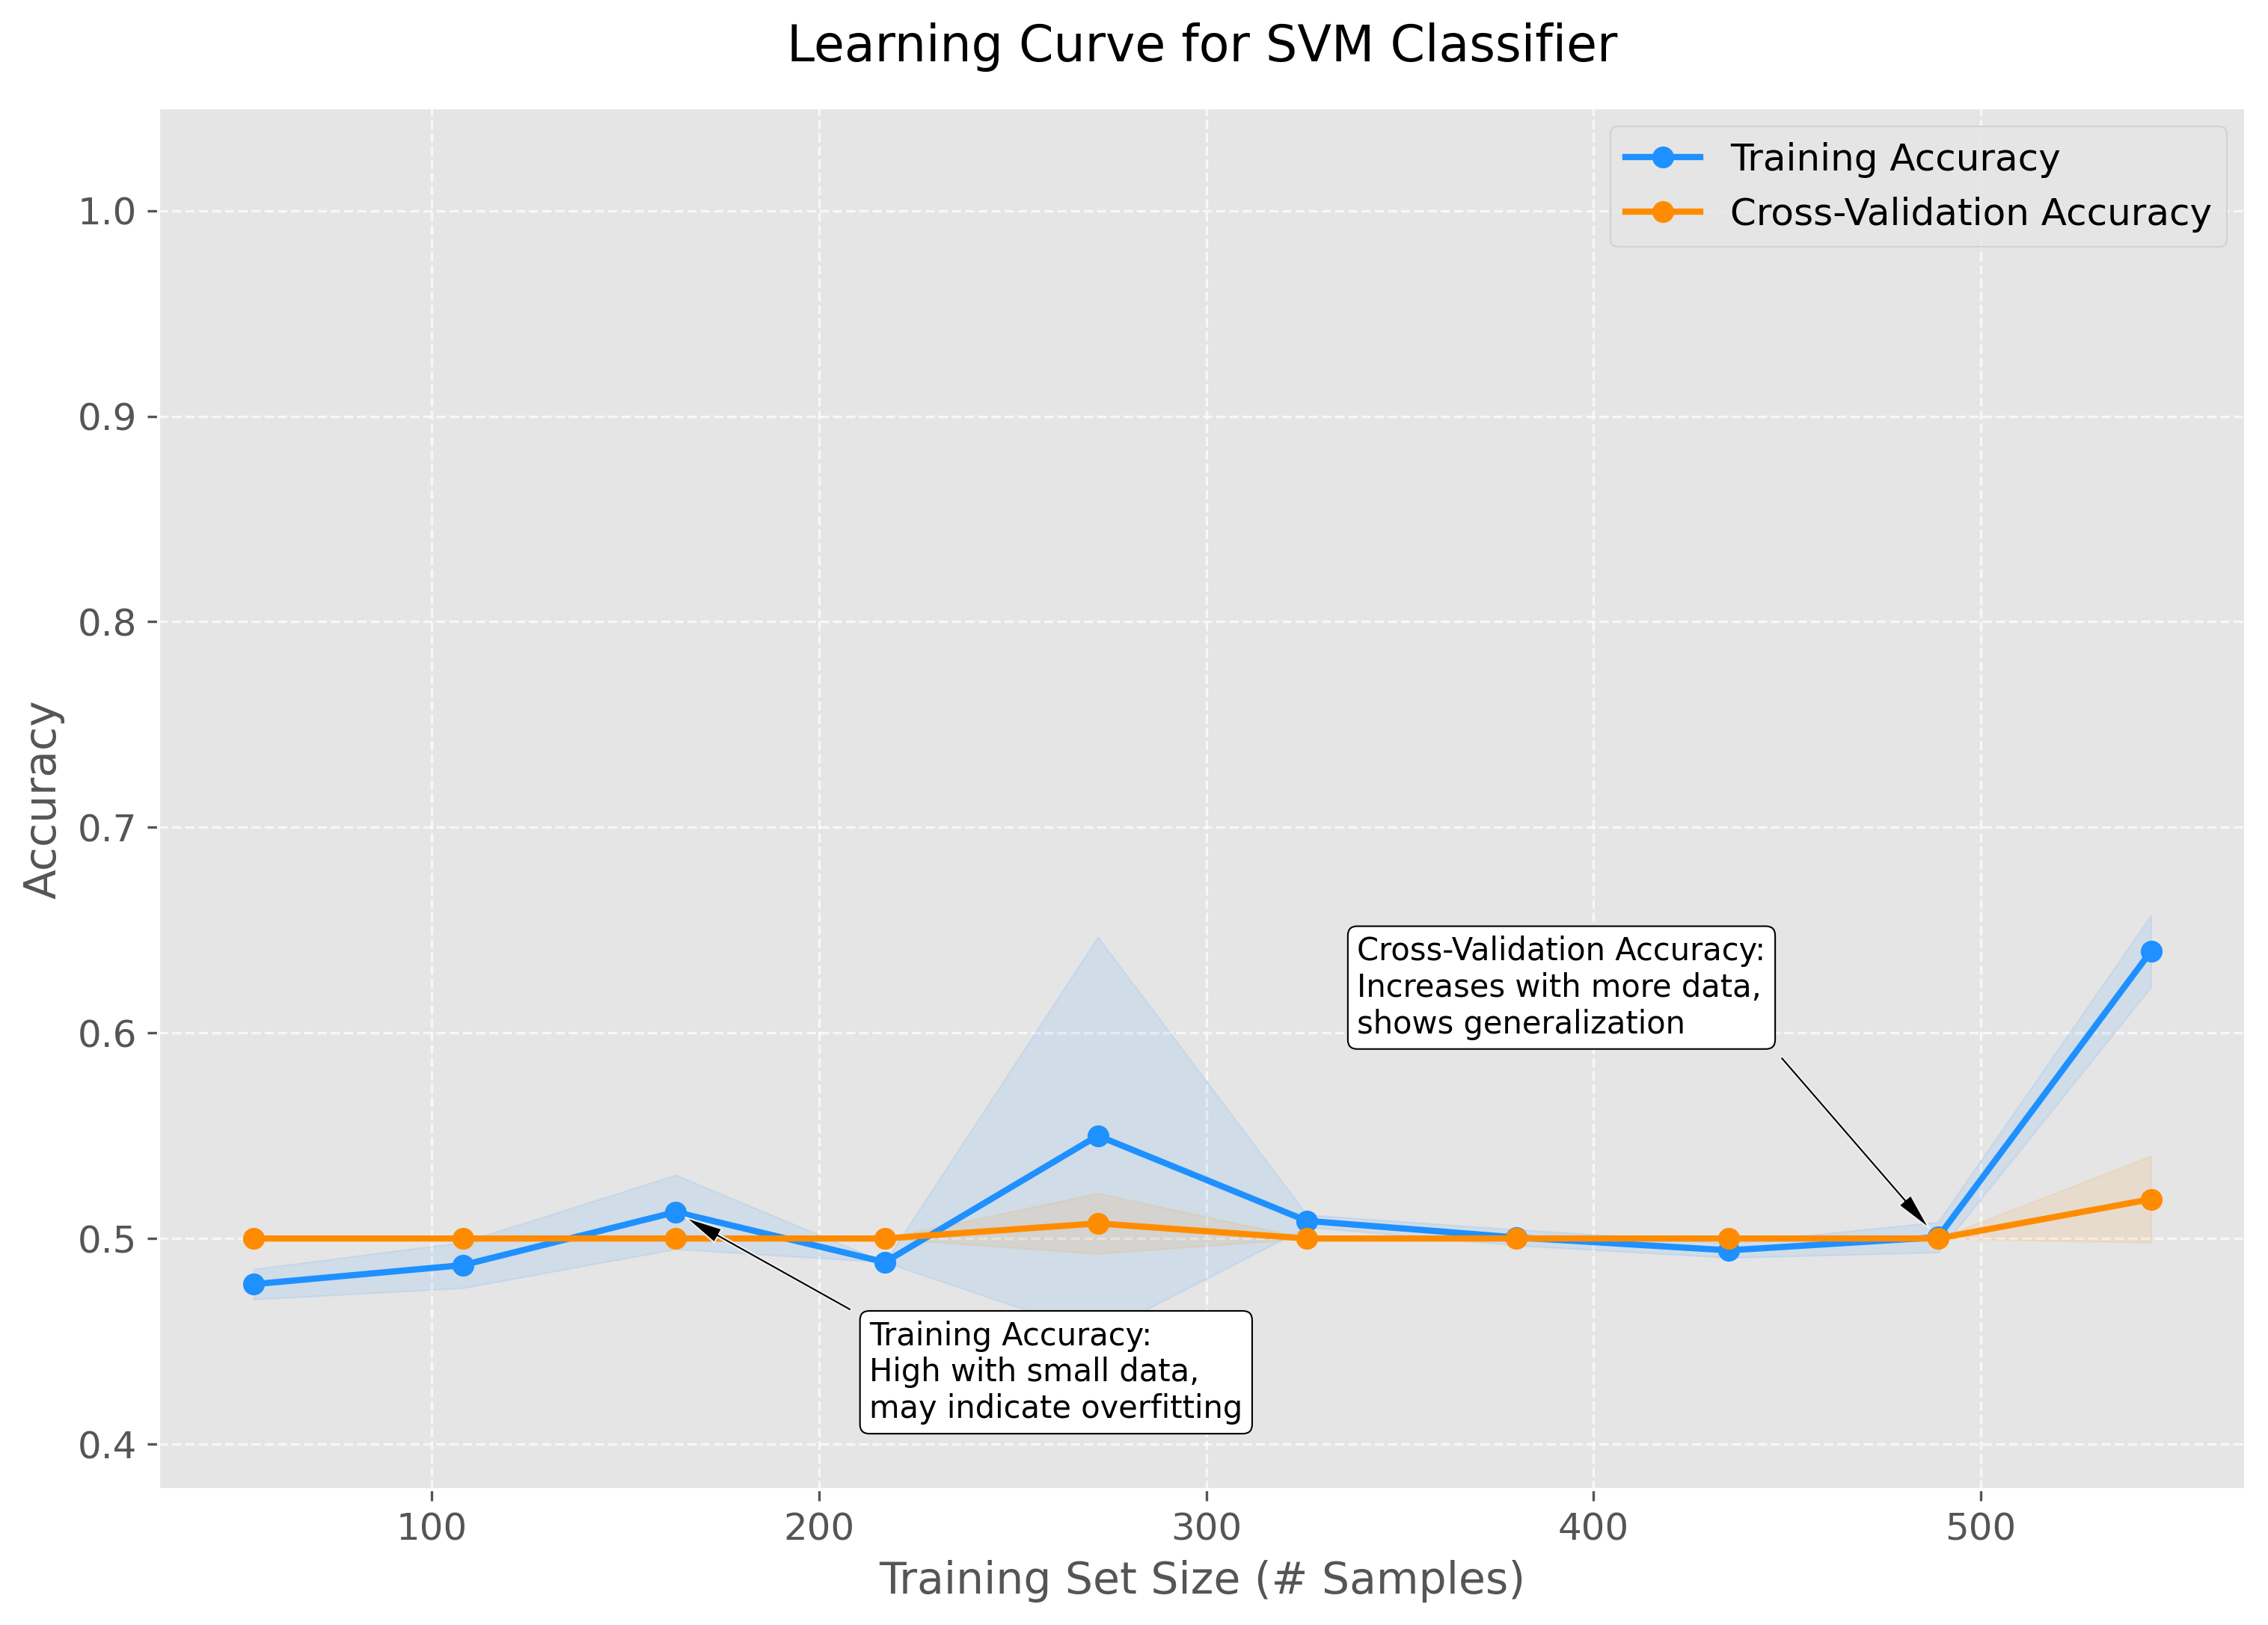

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, learning_curve
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Hyperparameter tuning with GridSearchCV
svm = SVC(class_weight='balanced', random_state=42)
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 0.001, 0.01, 0.1],
    'kernel': ['rbf', 'linear']
}

# Perform GridSearchCV
svm_cv = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
svm_cv.fit(X_train, y_train)

# Print best parameters and cross-validation accuracy
print(f"Best SVM Parameters: {svm_cv.best_params_}")
print(f"Best Cross-Validation Accuracy (GridSearchCV): {svm_cv.best_score_:.4f}")

# Step 2: Generate learning curve data using the best parameters
best_svm = SVC(**svm_cv.best_params_, class_weight='balanced', random_state=42)

# Define training sizes (10% to 100% of training data)
train_sizes = np.linspace(0.1, 1.0, 10)

# Compute learning curve scores
train_sizes, train_scores, val_scores = learning_curve(
    best_svm,
    X_train,
    y_train,
    train_sizes=train_sizes,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)

# Calculate mean and standard deviation
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Step 3: Create high-quality learning curve plot
plt.figure(figsize=(12, 8), dpi=300)  # High-resolution figure
plt.plot(train_sizes, train_scores_mean, 'o-', color='dodgerblue', label='Training Accuracy', linewidth=2)
plt.plot(train_sizes, val_scores_mean, 'o-', color='darkorange', label='Cross-Validation Accuracy', linewidth=2)

# Add shaded regions for standard deviation
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color='dodgerblue')
plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
                 val_scores_mean + val_scores_std, alpha=0.1, color='darkorange')

# Customize plot
plt.xlabel('Training Set Size (# Samples)', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Learning Curve for SVM Classifier', fontsize=16, pad=15)
plt.legend(loc='best', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add annotations for student explanation
plt.annotate('Training Accuracy:\nHigh with small data,\nmay indicate overfitting',
            xy=(train_sizes[2], train_scores_mean[2]),
            xytext=(train_sizes[2] + 50, train_scores_mean[2] - 0.1),
            arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=5),
            fontsize=10, bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white"))

plt.annotate('Cross-Validation Accuracy:\nIncreases with more data,\nshows generalization',
            xy=(train_sizes[-2], val_scores_mean[-2]),
            xytext=(train_sizes[-2] - 150, val_scores_mean[-2] + 0.1),
            arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=5),
            fontsize=10, bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white"))

# Ensure y-axis starts at a reasonable value for clarity
plt.ylim(min(min(train_scores_mean), min(val_scores_mean)) - 0.1, 1.05)

# Save plot as high-quality image
# plt.savefig('svm_learning_curve_high_quality.png', dpi=300, bbox_inches='tight')
plt.show()

# Logistic regression model(with GridSearchCV)





* **What it does differently**:

  1. **Hyperparameter Tuning with GridSearchCV**

     * Instead of fixing hyperparameters, it tries **many combinations** of:

       * `C` (regularization strength)
       * `penalty` (L1 or L2)
       * `solver` (liblinear or saga)
     * Uses **cross-validation (cv=5)** to find the best performing set of parameters.

  2. **Cross-validation Evaluation**

     * Reports not just accuracy on the training set but also the **average cross-validation accuracy ± standard deviation**, which is a more reliable measure of performance.

  3. **Best Model Selection**

     * Picks the best Logistic Regression model (based on grid search results).
     * Trains it fully on the training data.
     * Finally evaluates it on the test set, just like the first code.



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Hyperparameter tuning with GridSearchCV
logreg = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)

# Define parameter grid for C, penalty, and solver
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']  # liblinear supports both l1 and l2
}

# Add saga solver for l1 and l2 penalties separately to avoid incompatibility
param_grid_saga = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['saga']
}

# Combine parameter grids
param_grid.update(param_grid_saga)

# Perform GridSearchCV to find the best parameters
logreg_cv = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
logreg_cv.fit(X_train, y_train)

# Print best parameters and cross-validation accuracy
print(f"Best Logistic Regression Parameters: {logreg_cv.best_params_}")
print(f"Best Cross-Validation Accuracy (GridSearchCV): {logreg_cv.best_score_:.4f}")

# Step 2: Cross-validation with the best model
best_logreg = logreg_cv.best_estimator_
cv_scores = cross_val_score(best_logreg, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)
print(f"\nCross-Validation Accuracy (Best Logistic Regression): {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

# Step 3: Train the best model on the full training set
best_logreg.fit(X_train, y_train)

# Step 4: Predict on the test set
y_pred_logreg = best_logreg.predict(X_test)

# Step 5: Evaluate the model
accuracy = accuracy_score(y_test, y_pred_logreg)
print(f"\nTest Set Accuracy (Logistic Regression): {accuracy:.4f}")
print("\nClassification Report (Logistic Regression):")
print(classification_report(y_test, y_pred_logreg))

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best Logistic Regression Parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
Best Cross-Validation Accuracy (GridSearchCV): 0.5353

Cross-Validation Accuracy (Best Logistic Regression): 0.5353 ± 0.0401

Test Set Accuracy (Logistic Regression): 0.4678

Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.47      0.47      0.47        85
           1       0.47      0.47      0.47        86

    accuracy                           0.47       171
   macro avg       0.47      0.47      0.47       171
weighted avg       0.47      0.47      0.47       171



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


# All the SVM models we tried

### **1. Basic SVM (fixed parameters)**

* we defined an SVM model with some chosen values of `C`, `gamma`, and `kernel`.
* Trained it and tested accuracy.
  👉 Purpose: *Quick baseline* — see how SVM performs without optimization.

---

### **2. SVM + GridSearchCV (on all features)**

* Used GridSearchCV to find the best hyperparameters (`C`, `gamma`, `kernel`).
* Picked the best model and tested it.
  👉 Purpose: *Find the best SVM configuration automatically.*

---

### **3. SVM + GridSearchCV (on Lasso-selected features)**

* First used **Lasso regression** for feature selection → reduced feature set.
* Then applied SVM + GridSearchCV only on those selected features.
  👉 Purpose: *Check if SVM performs better when irrelevant features are removed.*

---

### **4. SVM + GridSearchCV + Learning Curve (current one)**

* Did GridSearchCV again to find best parameters.
* **Extra step**: Generated a **learning curve** to study how training accuracy and validation accuracy change as the dataset size increases.
  👉 Purpose: *Not just performance, but also diagnosis.*
* Helps you answer:

  * Is the model overfitting?
  * Is the model underfitting?
  * Would adding more training data improve performance?

